# Análise Exploratória de Dados (EDA) - dados_unidos.csv

## Objetivo
Análise exploratória completa do dataset `dados_unidos.csv` contendo dados de empresas brasileiras com presença no Instagram.

## Estrutura da Análise
1. Carregamento e Visão Geral
2. Limpeza e Conversão de Tipos
3. Estatísticas Descritivas
4. Análise de Valores Ausentes
5. Análise de Duplicatas
6. Distribuições de Variáveis Numéricas
7. Detecção de Outliers
8. Matriz de Correlação
9. Análise Temporal
10. Análise de Texto (Biography e Caption)
11. Análise de Business Account
12. Análise de Engajamento
13. Insights e Conclusões



In [17]:
#!/usr/bin/env python3
"""
Análise Exploratória de Dados (EDA) - dados_unidos.csv
Dataset: Dados de empresas brasileiras com presença no Instagram
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
import re
from collections import Counter

# Configurações
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Configurações de visualização
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✅ Bibliotecas importadas com sucesso!")



✅ Bibliotecas importadas com sucesso!


## 1. Carregamento e Visão Geral



In [18]:
print("="*80)
print("CARREGAMENTO DOS DADOS")
print("="*80)

# Carregar o dataset
df = pd.read_csv('dados_unidos.csv', low_memory=False)

print(f"\n✅ Dataset carregado com sucesso!")
print(f"📊 Dimensões: {df.shape[0]:,} linhas x {df.shape[1]} colunas")
print(f"💾 Tamanho em memória: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Primeiras linhas
print("\n📋 Primeiras 5 linhas do dataset:")
print(df.head())

# Últimas linhas
print("\n📋 Últimas 5 linhas do dataset:")
print(df.tail())

# Informações gerais
print("\n📊 Informações do Dataset:")
print(df.info())

# Tipos de dados
print("\n📈 Tipos de dados por coluna:")
print(df.dtypes)

# Colunas disponíveis
print("\n📋 Colunas disponíveis:")
print(df.columns.tolist())



CARREGAMENTO DOS DADOS

✅ Dataset carregado com sucesso!
📊 Dimensões: 2,068,457 linhas x 10 colunas
💾 Tamanho em memória: 4732.69 MB

📋 Primeiras 5 linhas do dataset:
                 cnpj followers_count media_count  \
0  07.118.629/0001-80         17404.0       691.0   
1  07.118.629/0001-80         17404.0       691.0   
2  07.118.629/0001-80         17404.0       691.0   
3  07.118.629/0001-80         17404.0       691.0   
4  07.118.629/0001-80         17404.0       691.0   

                                 profile_picture_url  \
0  https://scontent.fpoa4-1.fna.fbcdn.net/v/t51.2...   
1  https://scontent.fpoa4-1.fna.fbcdn.net/v/t51.2...   
2  https://scontent.fpoa4-1.fna.fbcdn.net/v/t51.2...   
3  https://scontent.fpoa4-1.fna.fbcdn.net/v/t51.2...   
4  https://scontent.fpoa4-1.fna.fbcdn.net/v/t51.2...   

                                           biography  \
0  Incorporadora com 23 anos de atuação em Capão ...   
1  Incorporadora com 23 anos de atuação em Capão ...   
2  Incorp

## 2. Limpeza e Conversão de Tipos



In [19]:
print("\n" + "="*80)
print("LIMPEZA E CONVERSÃO DE TIPOS DE DADOS")
print("="*80)

# Converter colunas numéricas para o tipo correto
numeric_columns = ['followers_count', 'media_count', 'like_count']

for col in numeric_columns:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        print(f"✅ {col} convertido para numérico")

# Converter business_account para boolean
if 'business_account' in df.columns:
    df['business_account'] = df['business_account'].map({
        'true': True, 
        'True': True, 
        True: True,
        'false': False, 
        'False': False, 
        False: False
    })
    print(f"✅ business_account convertido para boolean")

# Converter timestamp para datetime
if 'timestamp' in df.columns:
    df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
    print(f"✅ timestamp convertido para datetime")

print("\n📊 Tipos de dados após conversão:")
print(df.dtypes)

# Verificar valores únicos em business_account
if 'business_account' in df.columns:
    print(f"\n📊 Distribuição de business_account:")
    print(df['business_account'].value_counts())




LIMPEZA E CONVERSÃO DE TIPOS DE DADOS
✅ followers_count convertido para numérico
✅ media_count convertido para numérico
✅ like_count convertido para numérico
✅ business_account convertido para boolean
✅ timestamp convertido para datetime

📊 Tipos de dados após conversão:
cnpj                                object
followers_count                    float64
media_count                        float64
profile_picture_url                 object
biography                           object
caption                             object
like_count                         float64
timestamp              datetime64[ns, UTC]
business_account                    object
sobreviveu                           int64
dtype: object

📊 Distribuição de business_account:
business_account
True     1292231
False        432
Name: count, dtype: int64


## 3. Estatísticas Descritivas



In [20]:
print("\n" + "="*80)
print("ESTATÍSTICAS DESCRITIVAS")
print("="*80)

# Estatísticas numéricas
print("\n📊 Estatísticas Descritivas - Variáveis Numéricas:")
numeric_cols = df.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 0:
    print(df[numeric_cols].describe())

# Estatísticas adicionais
print("\n📊 Estatísticas Adicionais:")
for col in numeric_cols:
    print(f"\n{col}:")
    print(f"  - Mediana: {df[col].median():.2f}")
    mode_values = df[col].mode()
    print(f"  - Moda: {mode_values.values[0] if len(mode_values) > 0 else 'N/A'}")
    print(f"  - Variância: {df[col].var():.2f}")
    if df[col].mean() != 0:
        print(f"  - Coef. Variação: {(df[col].std() / df[col].mean() * 100):.2f}%")
    else:
        print(f"  - Coef. Variação: N/A")
    print(f"  - Assimetria (Skewness): {df[col].skew():.2f}")
    print(f"  - Curtose (Kurtosis): {df[col].kurtosis():.2f}")

# Estatísticas categóricas
print("\n📊 Estatísticas Descritivas - Variáveis Categóricas:")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if col not in ['profile_picture_url', 'biography', 'caption']:  # Pular colunas de texto longas
        print(f"\n{col}:")
        print(f"  - Valores únicos: {df[col].nunique()}")
        if df[col].nunique() < 20:
            print(f"  - Valores mais frequentes:")
            print(df[col].value_counts().head(10))




ESTATÍSTICAS DESCRITIVAS

📊 Estatísticas Descritivas - Variáveis Numéricas:
       followers_count  media_count     like_count  sobreviveu
count       2068021.00   2067996.00     1441301.00  2068457.00
mean          37274.92      1173.28      253283.87        0.62
std          230743.26      1101.23   114556785.88        0.48
min               0.00         1.00           0.00        0.00
25%            2511.00       541.00          10.00        0.00
50%            6198.00       906.00          23.00        1.00
75%           16461.00      1448.00          58.00        1.00
max         4863622.00     11264.00 51980305060.00        1.00

📊 Estatísticas Adicionais:

followers_count:
  - Mediana: 6198.00
  - Moda: 3337.0
  - Variância: 53242451113.72
  - Coef. Variação: 619.03%
  - Assimetria (Skewness): 16.12
  - Curtose (Kurtosis): 293.35

media_count:
  - Mediana: 906.00
  - Moda: 934.0
  - Variância: 1212718.27
  - Coef. Variação: 93.86%
  - Assimetria (Skewness): 3.79
  - Curtose (Ku

## 4. Análise de Valores Ausentes




ANÁLISE DE VALORES AUSENTES

❌ Colunas com valores ausentes:
             Coluna  Valores Ausentes  Percentual (%)
          timestamp            776226           37.53
   business_account            775794           37.51
         like_count            627156           30.32
            caption             51211            2.48
          biography             23318            1.13
profile_picture_url              5190            0.25
               cnpj              3323            0.16
        media_count               461            0.02
    followers_count               436            0.02


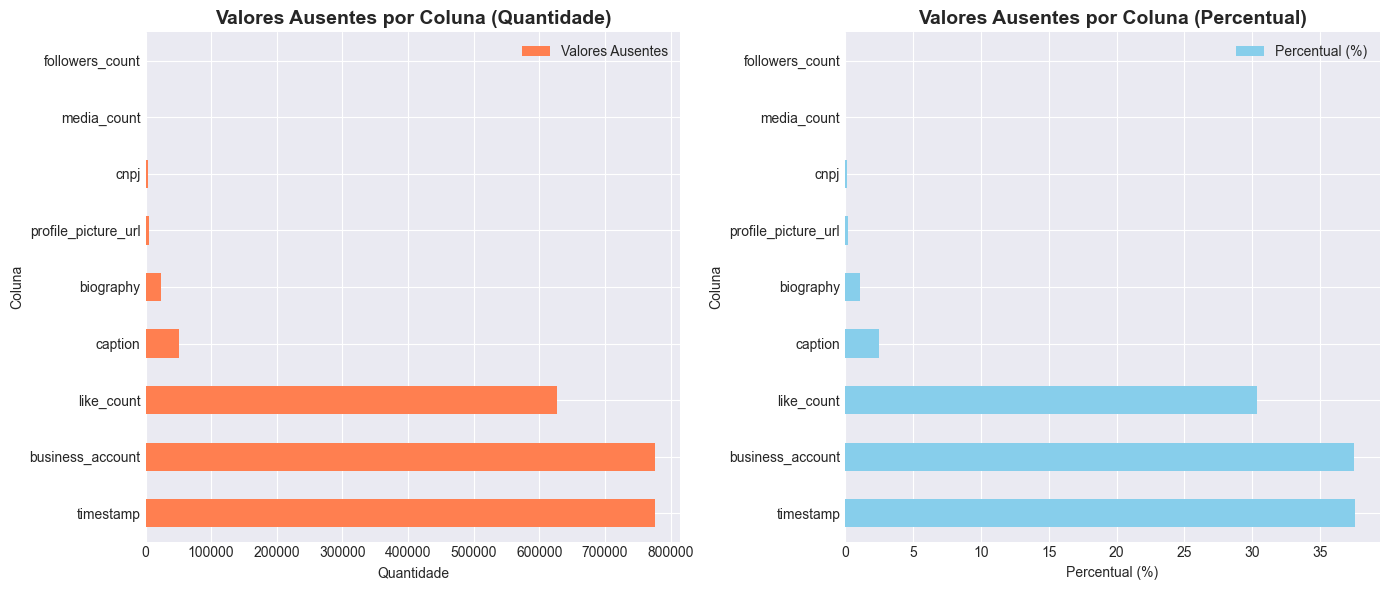

In [21]:
print("\n" + "="*80)
print("ANÁLISE DE VALORES AUSENTES")
print("="*80)

# Contagem de valores ausentes
missing_values = pd.DataFrame({
    'Coluna': df.columns,
    'Valores Ausentes': df.isnull().sum(),
    'Percentual (%)': (df.isnull().sum() / len(df)) * 100
})
missing_values = missing_values[missing_values['Valores Ausentes'] > 0].sort_values(
    by='Valores Ausentes', ascending=False
)

if len(missing_values) > 0:
    print("\n❌ Colunas com valores ausentes:")
    print(missing_values.to_string(index=False))
else:
    print("\n✅ Não há valores ausentes no dataset!")

# Visualização de valores ausentes
if len(missing_values) > 0:
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    missing_values.plot(x='Coluna', y='Valores Ausentes', kind='barh', 
                        color='coral', ax=axes[0])
    axes[0].set_title('Valores Ausentes por Coluna (Quantidade)', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Quantidade')
    axes[0].set_ylabel('Coluna')
    
    missing_values.plot(x='Coluna', y='Percentual (%)', kind='barh', 
                        color='skyblue', ax=axes[1])
    axes[1].set_title('Valores Ausentes por Coluna (Percentual)', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Percentual (%)')
    axes[1].set_ylabel('Coluna')
    
    plt.tight_layout()
    plt.show()




ANÁLISE DE DUPLICATAS

🔍 Total de linhas duplicadas: 219,226
📊 Percentual de duplicatas: 10.60%

🏢 CNPJs duplicados: 2,064,310
📊 Percentual: 99.80%

📊 Top 10 empresas com mais posts:
cnpj
29.148.473/0001-12    56698
17.286.699/0001-09     9881
92.659.416/0014-59     8173
32.678.980/0035-11     6208
85.179.240/0016-34     6021
30.356.106/0001-93     4678
03.506.951/0001-25     3500
18.605.919/0003-36     3480
12.315.386/0001-00     3473
17.626.354/0001-49     3459
Name: count, dtype: int64


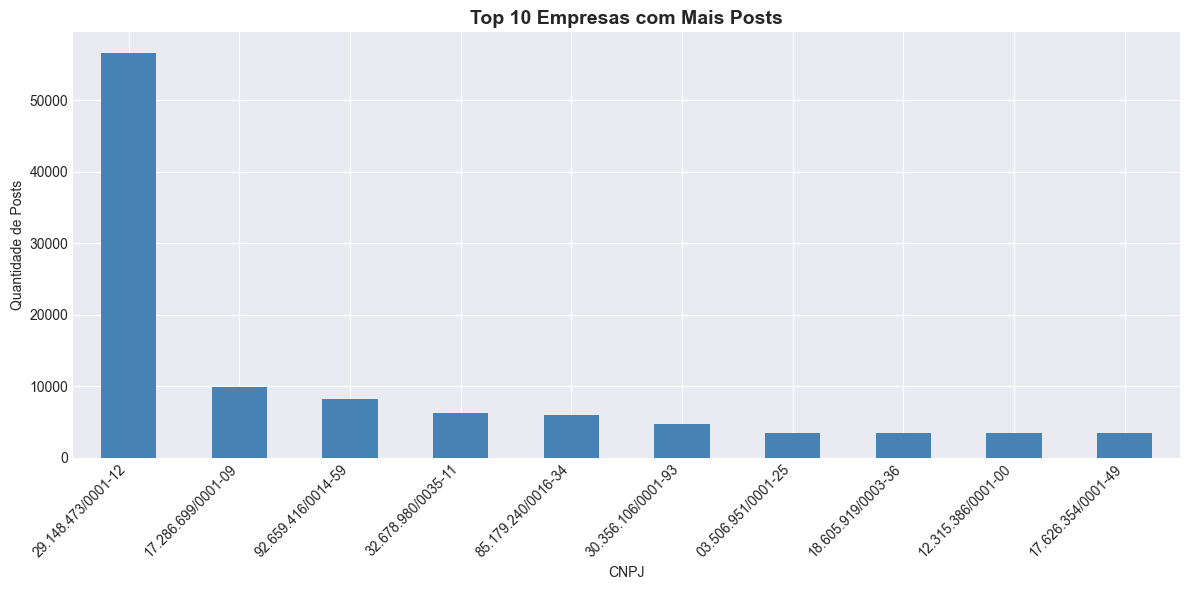

In [22]:
print("\n" + "="*80)
print("ANÁLISE DE DUPLICATAS")
print("="*80)

# Duplicatas totais
total_duplicates = df.duplicated().sum()
print(f"\n🔍 Total de linhas duplicadas: {total_duplicates:,}")
print(f"📊 Percentual de duplicatas: {(total_duplicates / len(df)) * 100:.2f}%")

# Duplicatas por CNPJ
if 'cnpj' in df.columns:
    cnpj_duplicates = df['cnpj'].duplicated().sum()
    print(f"\n🏢 CNPJs duplicados: {cnpj_duplicates:,}")
    print(f"📊 Percentual: {(cnpj_duplicates / len(df)) * 100:.2f}%")
    
    # Empresas com mais posts
    if cnpj_duplicates > 0:
        print("\n📊 Top 10 empresas com mais posts:")
        top_companies = df['cnpj'].value_counts().head(10)
        print(top_companies)
        
        # Visualização
        plt.figure(figsize=(12, 6))
        top_companies.plot(kind='bar', color='steelblue')
        plt.title('Top 10 Empresas com Mais Posts', fontsize=14, fontweight='bold')
        plt.xlabel('CNPJ')
        plt.ylabel('Quantidade de Posts')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()



## 6. Distribuições de Variáveis Numéricas




ANÁLISE DE VARIÁVEIS NUMÉRICAS


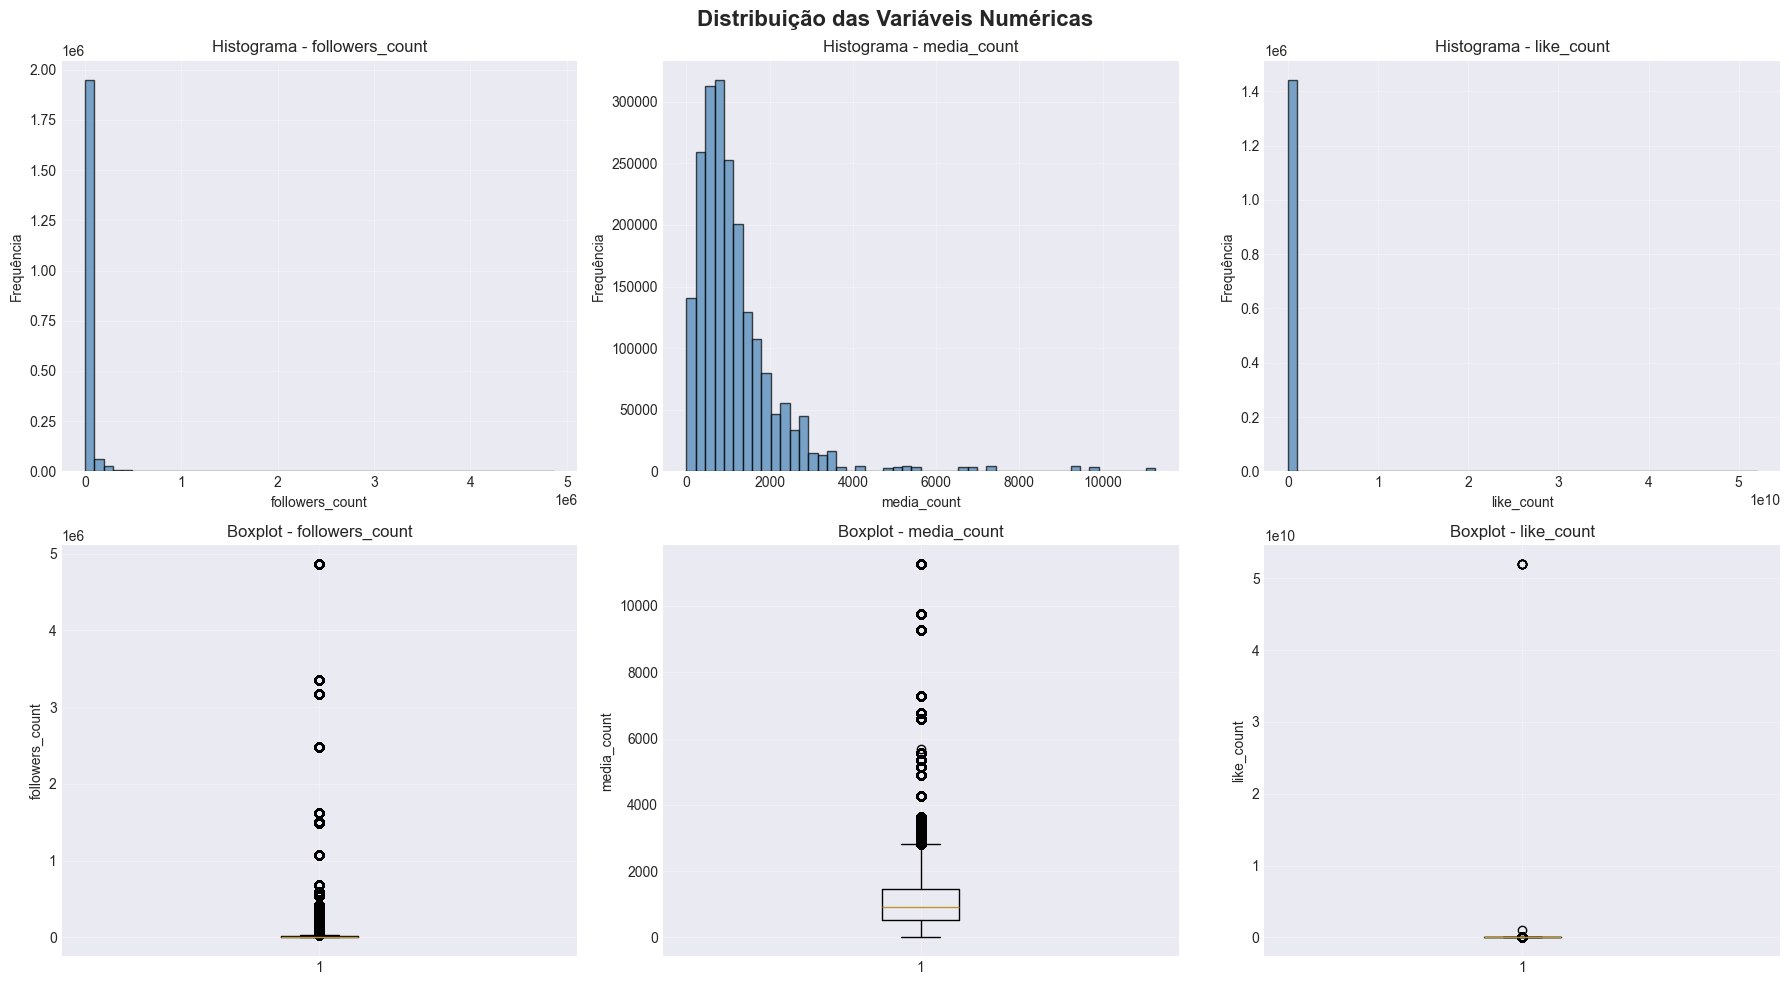

In [23]:
print("\n" + "="*80)
print("ANÁLISE DE VARIÁVEIS NUMÉRICAS")
print("="*80)

# Distribuição das variáveis numéricas
numeric_cols = ['followers_count', 'media_count', 'like_count']
numeric_cols = [col for col in numeric_cols if col in df.columns]

if len(numeric_cols) > 0:
    fig, axes = plt.subplots(2, len(numeric_cols), figsize=(6*len(numeric_cols), 10))
    if len(numeric_cols) == 1:
        axes = axes.reshape(-1, 1)
    fig.suptitle('Distribuição das Variáveis Numéricas', fontsize=16, fontweight='bold')
    
    for idx, col in enumerate(numeric_cols):
        # Histograma
        data_clean = df[col].dropna()
        if len(data_clean) > 0:
            axes[0, idx].hist(data_clean, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
            axes[0, idx].set_title(f'Histograma - {col}')
            axes[0, idx].set_xlabel(col)
            axes[0, idx].set_ylabel('Frequência')
            axes[0, idx].grid(True, alpha=0.3)
            
            # Boxplot
            axes[1, idx].boxplot(data_clean, vert=True)
            axes[1, idx].set_title(f'Boxplot - {col}')
            axes[1, idx].set_ylabel(col)
            axes[1, idx].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Nenhuma coluna numérica encontrada para análise")



## 7. Análise de Outliers (Método IQR)



In [24]:
print("\n" + "="*80)
print("ANÁLISE DE OUTLIERS (IQR Method)")
print("="*80)

def detect_outliers_iqr(data, column):
    """Detecta outliers usando o método IQR"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

numeric_cols = ['followers_count', 'media_count', 'like_count']
numeric_cols = [col for col in numeric_cols if col in df.columns]

for col in numeric_cols:
    outliers, lower, upper = detect_outliers_iqr(df, col)
    print(f"\n📊 {col}:")
    print(f"  - Limite inferior: {lower:.2f}")
    print(f"  - Limite superior: {upper:.2f}")
    print(f"  - Outliers detectados: {len(outliers):,} ({(len(outliers)/len(df))*100:.2f}%)")
    
    if len(outliers) > 0:
        print(f"  - Valores mín/máx dos outliers: {outliers[col].min():.2f} / {outliers[col].max():.2f}")




ANÁLISE DE OUTLIERS (IQR Method)

📊 followers_count:
  - Limite inferior: -18414.00
  - Limite superior: 37386.00
  - Outliers detectados: 281,970 (13.63%)
  - Valores mín/máx dos outliers: 37494.00 / 4863622.00

📊 media_count:
  - Limite inferior: -819.50
  - Limite superior: 2808.50
  - Outliers detectados: 113,936 (5.51%)
  - Valores mín/máx dos outliers: 2809.00 / 11264.00

📊 like_count:
  - Limite inferior: -62.00
  - Limite superior: 130.00
  - Outliers detectados: 169,625 (8.20%)
  - Valores mín/máx dos outliers: 131.00 / 51980305060.00


## 8. Matriz de Correlação




ANÁLISE DE CORRELAÇÃO

📊 Matriz de Correlação:
                 followers_count  media_count  like_count  sobreviveu
followers_count             1.00         0.11        0.00        0.05
media_count                 0.11         1.00       -0.00        0.27
like_count                  0.00        -0.00        1.00       -0.01
sobreviveu                  0.05         0.27       -0.01        1.00


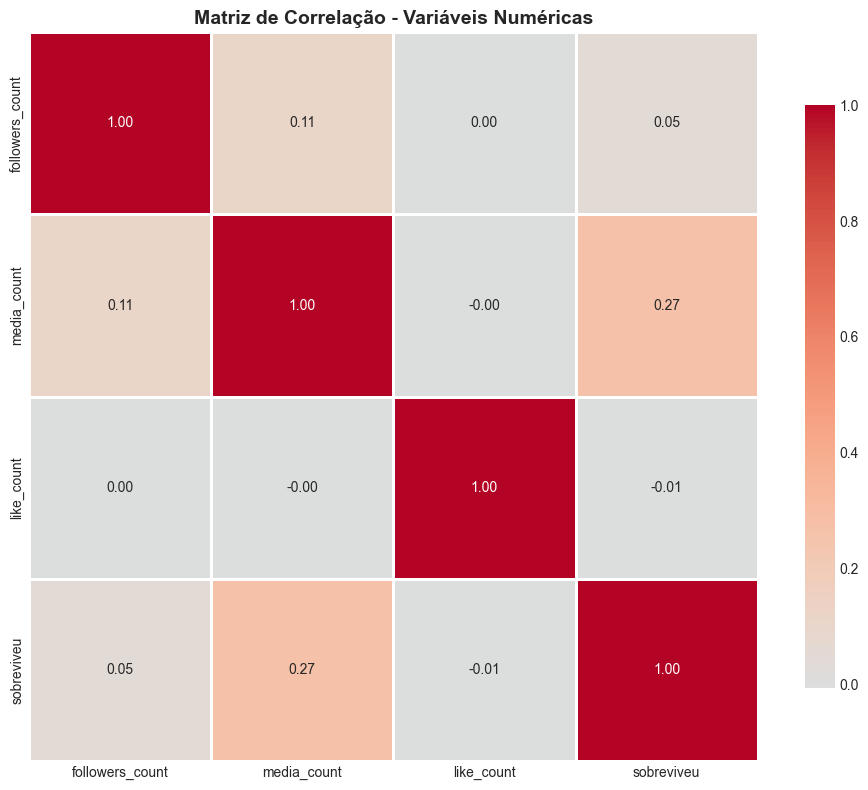


🔗 Correlações mais fortes (|r| > 0.5):
  Nenhuma correlação forte encontrada (|r| > 0.5)


In [25]:
print("\n" + "="*80)
print("ANÁLISE DE CORRELAÇÃO")
print("="*80)

# Selecionar apenas colunas numéricas
numeric_df = df.select_dtypes(include=[np.number])

if len(numeric_df.columns) > 0:
    # Calcular matriz de correlação
    correlation_matrix = numeric_df.corr()
    
    print("\n📊 Matriz de Correlação:")
    print(correlation_matrix)
    
    # Visualização da matriz de correlação
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                square=True, linewidths=1, fmt='.2f', cbar_kws={"shrink": 0.8})
    plt.title('Matriz de Correlação - Variáveis Numéricas', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Correlações fortes
    print("\n🔗 Correlações mais fortes (|r| > 0.5):")
    strong_corrs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_value = correlation_matrix.iloc[i, j]
            if abs(corr_value) > 0.5 and not np.isnan(corr_value):
                strong_corrs.append({
                    'Var1': correlation_matrix.columns[i],
                    'Var2': correlation_matrix.columns[j],
                    'Correlação': corr_value
                })
    
    if strong_corrs:
        for corr in strong_corrs:
            print(f"  - {corr['Var1']} vs {corr['Var2']}: {corr['Correlação']:.3f}")
    else:
        print("  Nenhuma correlação forte encontrada (|r| > 0.5)")
else:
    print("⚠️ Nenhuma variável numérica disponível para análise de correlação")



## 9. Análise Temporal




ANÁLISE TEMPORAL

📅 Período dos dados:
  - Data inicial: 2011-05-31 06:32:15+00:00
  - Data final: 2025-05-14 01:07:15+00:00
  - Período total: 5096 dias


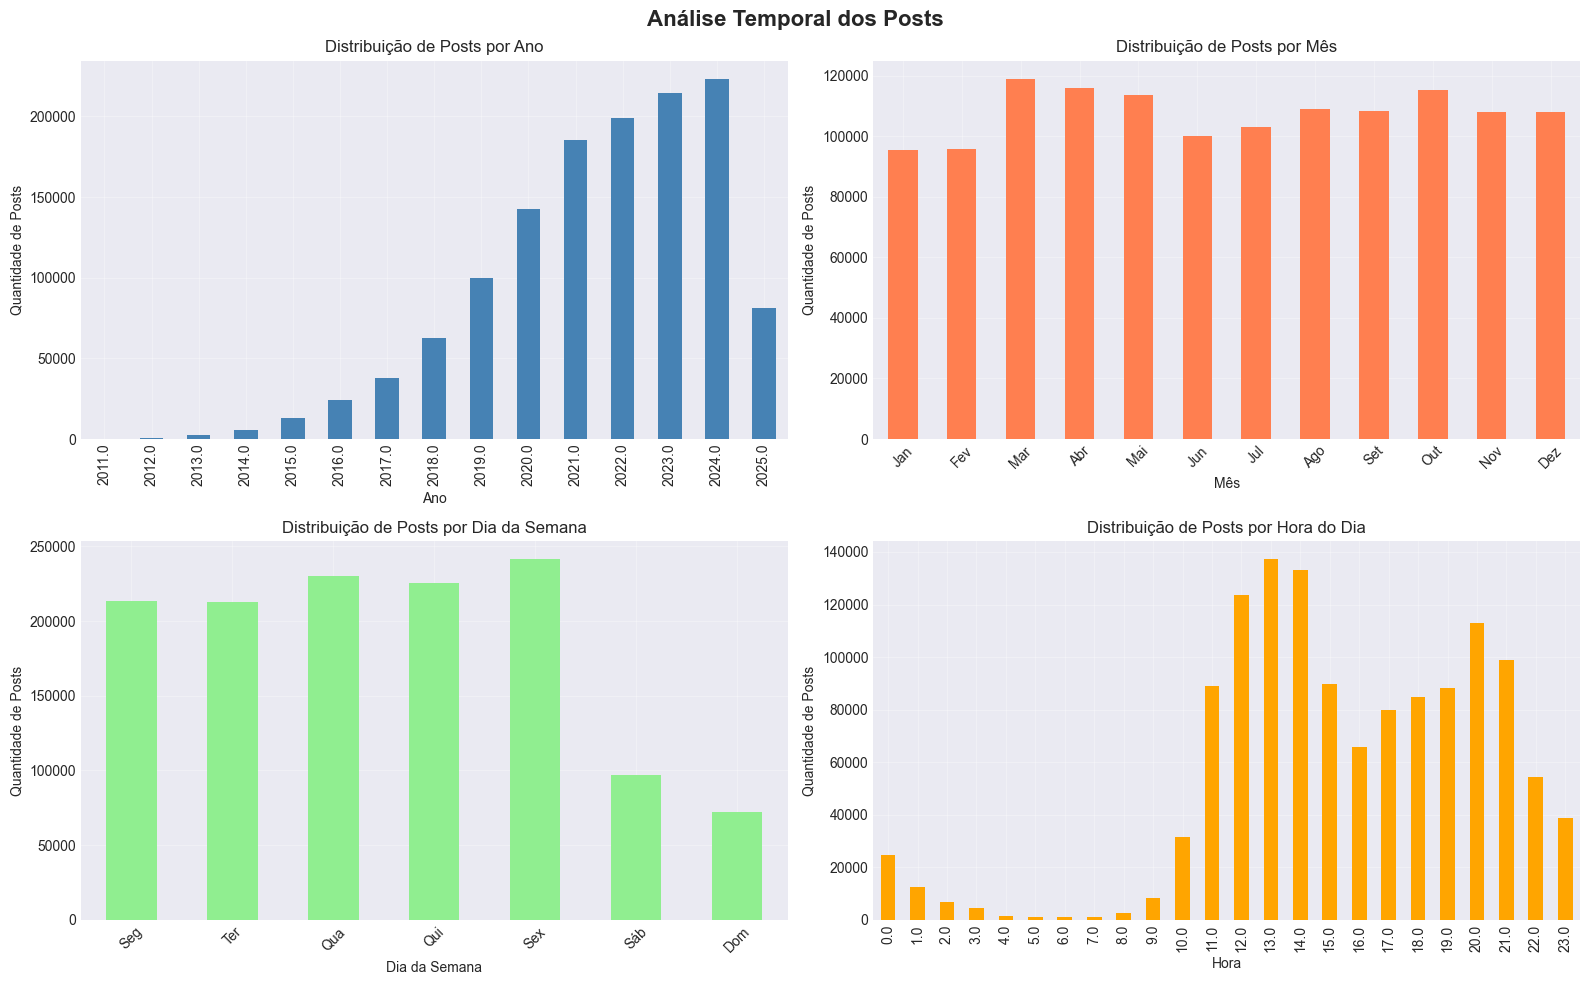

In [26]:
print("\n" + "="*80)
print("ANÁLISE TEMPORAL")
print("="*80)

# Converter timestamp para datetime (se ainda não foi convertido)
if 'timestamp' in df.columns:
    if df['timestamp'].dtype == 'object':
        df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
    
    # Extrair componentes temporais
    df['year'] = df['timestamp'].dt.year
    df['month'] = df['timestamp'].dt.month
    df['day'] = df['timestamp'].dt.day
    df['day_of_week'] = df['timestamp'].dt.dayofweek
    df['hour'] = df['timestamp'].dt.hour
    df['day_name'] = df['timestamp'].dt.day_name()
    df['month_name'] = df['timestamp'].dt.month_name()
    
    print("\n📅 Período dos dados:")
    print(f"  - Data inicial: {df['timestamp'].min()}")
    print(f"  - Data final: {df['timestamp'].max()}")
    if df['timestamp'].min() is not pd.NaT and df['timestamp'].max() is not pd.NaT:
        periodo_dias = (df['timestamp'].max() - df['timestamp'].min()).days
        print(f"  - Período total: {periodo_dias} dias")
    
    # Visualizações temporais
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    fig.suptitle('Análise Temporal dos Posts', fontsize=16, fontweight='bold')
    
    # Posts por ano
    if df['year'].notna().sum() > 0:
        year_counts = df['year'].value_counts().sort_index()
        year_counts.plot(kind='bar', ax=axes[0, 0], color='steelblue')
        axes[0, 0].set_title('Distribuição de Posts por Ano')
        axes[0, 0].set_xlabel('Ano')
        axes[0, 0].set_ylabel('Quantidade de Posts')
        axes[0, 0].grid(True, alpha=0.3)
    
    # Posts por mês
    if df['month'].notna().sum() > 0:
        month_counts = df['month'].value_counts().sort_index()
        month_counts.plot(kind='bar', ax=axes[0, 1], color='coral')
        axes[0, 1].set_title('Distribuição de Posts por Mês')
        axes[0, 1].set_xlabel('Mês')
        axes[0, 1].set_ylabel('Quantidade de Posts')
        axes[0, 1].set_xticklabels(['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 
                                     'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], rotation=45)
        axes[0, 1].grid(True, alpha=0.3)
    
    # Posts por dia da semana
    if df['day_name'].notna().sum() > 0:
        day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        day_counts = df['day_name'].value_counts().reindex(day_order)
        day_counts.plot(kind='bar', ax=axes[1, 0], color='lightgreen')
        axes[1, 0].set_title('Distribuição de Posts por Dia da Semana')
        axes[1, 0].set_xlabel('Dia da Semana')
        axes[1, 0].set_ylabel('Quantidade de Posts')
        axes[1, 0].set_xticklabels(['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb', 'Dom'], rotation=45)
        axes[1, 0].grid(True, alpha=0.3)
    
    # Posts por hora do dia
    if df['hour'].notna().sum() > 0:
        hour_counts = df['hour'].value_counts().sort_index()
        hour_counts.plot(kind='bar', ax=axes[1, 1], color='orange')
        axes[1, 1].set_title('Distribuição de Posts por Hora do Dia')
        axes[1, 1].set_xlabel('Hora')
        axes[1, 1].set_ylabel('Quantidade de Posts')
        axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Coluna 'timestamp' não encontrada no dataset")



In [27]:
print("\n" + "="*80)
print("ANÁLISE DE TEXTO - BIOGRAPHY")
print("="*80)

if 'biography' in df.columns:
    # Estatísticas de comprimento
    df['biography_length'] = df['biography'].fillna('').astype(str).apply(len)
    df['biography_words'] = df['biography'].fillna('').astype(str).apply(lambda x: len(x.split()))
    
    print("\n📝 Estatísticas de Biography:")
    print(f"  - Comprimento médio: {df['biography_length'].mean():.2f} caracteres")
    print(f"  - Comprimento mediano: {df['biography_length'].median():.2f} caracteres")
    print(f"  - Palavras médias: {df['biography_words'].mean():.2f}")
    print(f"  - Biografias vazias: {(df['biography_length'] == 0).sum():,} ({((df['biography_length'] == 0).sum()/len(df))*100:.2f}%)")
    
    # Palavras mais comuns
    print("\n🔤 Top 20 palavras mais frequentes nas biografias:")
    all_words = ' '.join(df['biography'].fillna('').astype(str)).lower()
    all_words = re.findall(r'\b\w+\b', all_words)
    word_counts = Counter(all_words)
    common_words = word_counts.most_common(20)
    for word, count in common_words:
        print(f"  - {word}: {count:,}")
    
    # Hashtags mais usadas
    print("\n#️⃣ Top 10 hashtags mais usadas nas biografias:")
    all_hashtags = ' '.join(df['biography'].fillna('').astype(str))
    hashtags = re.findall(r'#\w+', all_hashtags)
    hashtag_counts = Counter(hashtags)
    common_hashtags = hashtag_counts.most_common(10)
    for tag, count in common_hashtags:
        print(f"  - {tag}: {count:,}")
    
    # Emojis
    print("\n😊 Uso de emojis nas biografias:")
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags
            "]+", flags=re.UNICODE)
    df['has_emoji_bio'] = df['biography'].fillna('').astype(str).apply(lambda x: bool(emoji_pattern.search(x)))
    print(f"  - Biografias com emoji: {df['has_emoji_bio'].sum():,} ({(df['has_emoji_bio'].sum()/len(df))*100:.2f}%)")
else:
    print("⚠️ Coluna 'biography' não encontrada no dataset")




ANÁLISE DE TEXTO - BIOGRAPHY

📝 Estatísticas de Biography:
  - Comprimento médio: 104.46 caracteres
  - Comprimento mediano: 113.00 caracteres
  - Palavras médias: 16.60
  - Biografias vazias: 23,318 (1.13%)

🔤 Top 20 palavras mais frequentes nas biografias:
  - de: 1,499,219
  - e: 1,366,921
  - a: 665,768
  - em: 659,130
  - para: 514,959
  - do: 482,072
  - o: 446,017
  - mais: 393,139
  - no: 381,792
  - com: 369,177
  - anos: 325,350
  - da: 311,211
  - rs: 204,503
  - brasil: 203,818
  - que: 178,244
  - sua: 172,028
  - há: 168,487
  - seu: 162,437
  - é: 144,334
  - na: 138,680

#️⃣ Top 10 hashtags mais usadas nas biografias:
  - #ExperiênciaCamarada: 3,235
  - #Restaurante: 3,235
  - #PaixãopeloChá: 3,070
  - #comidadeverdade: 2,889
  - #IFood: 2,631
  - #DestinosIncríveisViagensInesquecíveis: 2,307
  - #RolêCobasi: 2,216
  - #CobasiLovers: 2,216
  - #MeninaBonita26Anos: 2,189
  - #usemeninabonita: 2,189

😊 Uso de emojis nas biografias:
  - Biografias com emoji: 1,231,867 (59

## 11. Análise de Texto - Caption




ANÁLISE DE TEXTO - CAPTION

📝 Estatísticas de Caption:
  - Comprimento médio: 315.31 caracteres
  - Comprimento mediano: 214.00 caracteres
  - Palavras médias: 47.08
  - Captions vazias: 51,211 (2.48%)

#️⃣ Top 20 hashtags mais usadas nas captions:
  - #portoalegre: 25,592
  - #arquitetura: 21,591
  - #riograndedosul: 18,561
  - #saude: 15,242
  - #serragaucha: 15,084
  - #tecnologia: 14,820
  - #caxiasdosul: 14,733
  - #design: 13,366
  - #qualidade: 12,033
  - #brasil: 11,990
  - #agro: 10,556
  - #decor: 10,413
  - #casa: 10,258
  - #sustentabilidade: 9,397
  - #contabilidade: 8,206
  - #designdeinteriores: 7,820
  - #gramado: 7,746
  - #segurança: 7,575
  - #agricultura: 7,521
  - #tbt: 7,501


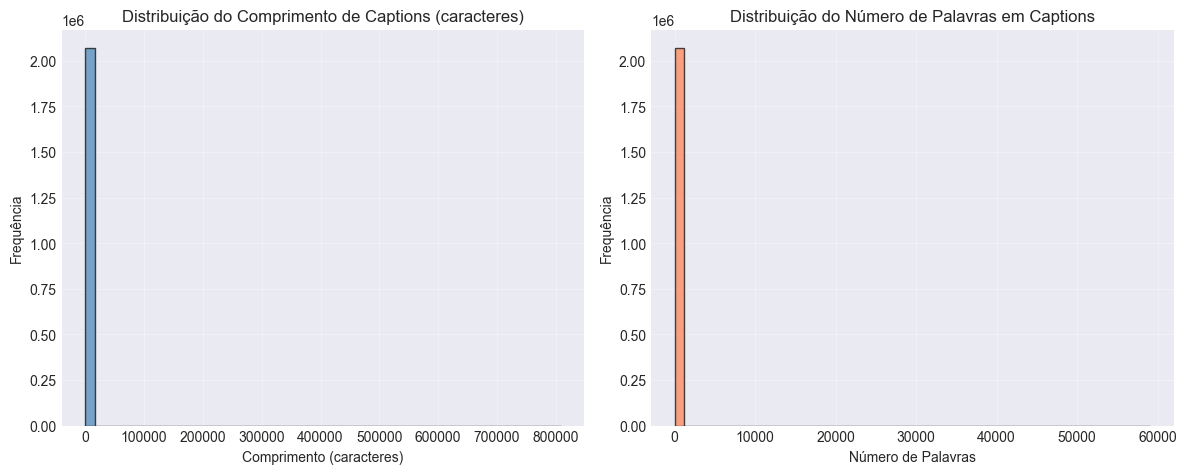

In [28]:
print("\n" + "="*80)
print("ANÁLISE DE TEXTO - CAPTION")
print("="*80)

if 'caption' in df.columns:
    # Estatísticas de comprimento
    df['caption_length'] = df['caption'].fillna('').astype(str).apply(len)
    df['caption_words'] = df['caption'].fillna('').astype(str).apply(lambda x: len(x.split()))
    
    print("\n📝 Estatísticas de Caption:")
    print(f"  - Comprimento médio: {df['caption_length'].mean():.2f} caracteres")
    print(f"  - Comprimento mediano: {df['caption_length'].median():.2f} caracteres")
    print(f"  - Palavras médias: {df['caption_words'].mean():.2f}")
    print(f"  - Captions vazias: {(df['caption_length'] == 0).sum():,} ({((df['caption_length'] == 0).sum()/len(df))*100:.2f}%)")
    
    # Hashtags mais usadas em captions
    print("\n#️⃣ Top 20 hashtags mais usadas nas captions:")
    all_caption_hashtags = ' '.join(df['caption'].fillna('').astype(str))
    caption_hashtags = re.findall(r'#\w+', all_caption_hashtags)
    caption_hashtag_counts = Counter(caption_hashtags)
    common_caption_hashtags = caption_hashtag_counts.most_common(20)
    for tag, count in common_caption_hashtags:
        print(f"  - {tag}: {count:,}")
    
    # Visualização do comprimento das captions
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    df['caption_length'].hist(bins=50, color='steelblue', edgecolor='black', alpha=0.7)
    plt.title('Distribuição do Comprimento de Captions (caracteres)')
    plt.xlabel('Comprimento (caracteres)')
    plt.ylabel('Frequência')
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 2, 2)
    df['caption_words'].hist(bins=50, color='coral', edgecolor='black', alpha=0.7)
    plt.title('Distribuição do Número de Palavras em Captions')
    plt.xlabel('Número de Palavras')
    plt.ylabel('Frequência')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Coluna 'caption' não encontrada no dataset")



## 12. Análise de Business Account




ANÁLISE DE BUSINESS ACCOUNT

📊 Distribuição de Business Account:
business_account
True     1292231
False        432
Name: count, dtype: int64

  - Contas comerciais: 1,292,231 (62.47%)
  - Contas pessoais: 432 (0.02%)

📊 Comparação de métricas entre tipos de conta:
                  followers_count  media_count  like_count
business_account                                          
False                         NaN          NaN         NaN
True                     45774.71      1401.78      150.41


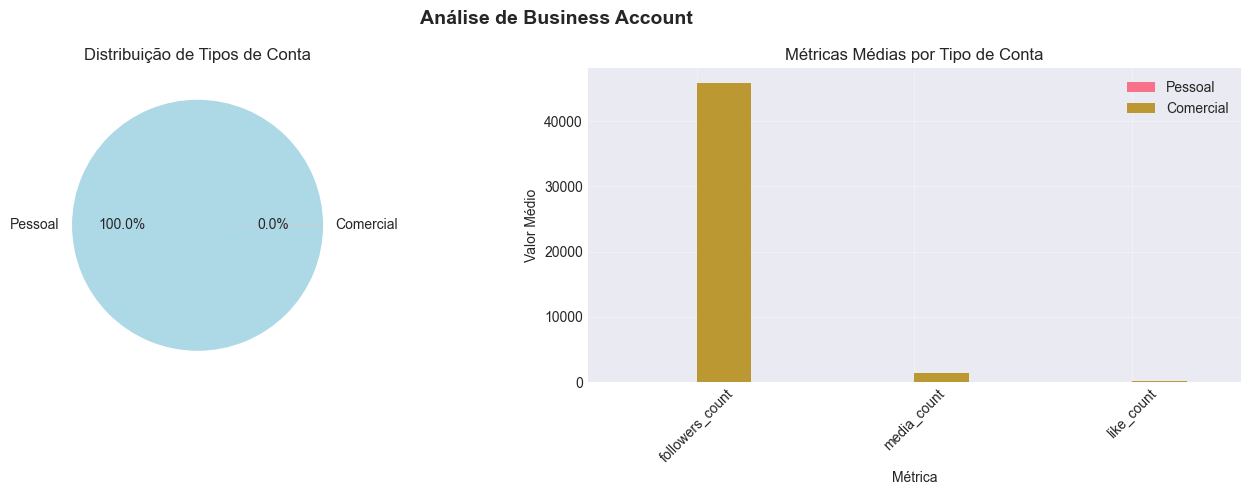

In [29]:
print("\n" + "="*80)
print("ANÁLISE DE BUSINESS ACCOUNT")
print("="*80)

if 'business_account' in df.columns:
    # Distribuição
    business_dist = df['business_account'].value_counts()
    print("\n📊 Distribuição de Business Account:")
    print(business_dist)
    print(f"\n  - Contas comerciais: {business_dist.get(True, 0):,} ({(business_dist.get(True, 0)/len(df))*100:.2f}%)")
    print(f"  - Contas pessoais: {business_dist.get(False, 0):,} ({(business_dist.get(False, 0)/len(df))*100:.2f}%)")
    
    # Comparação de métricas
    print("\n📊 Comparação de métricas entre tipos de conta:")
    numeric_cols = ['followers_count', 'media_count', 'like_count']
    numeric_cols = [col for col in numeric_cols if col in df.columns]
    
    if len(numeric_cols) > 0:
        metrics_comparison = df.groupby('business_account')[numeric_cols].mean()
        print(metrics_comparison)
        
        # Visualização
        if len(df['business_account'].dropna()) > 0:
            fig, axes = plt.subplots(1, 2, figsize=(14, 5))
            fig.suptitle('Análise de Business Account', fontsize=14, fontweight='bold')
            
            # Pizza
            business_dist.plot(kind='pie', ax=axes[0], autopct='%1.1f%%', 
                               labels=['Pessoal', 'Comercial'], colors=['lightblue', 'lightcoral'])
            axes[0].set_title('Distribuição de Tipos de Conta')
            axes[0].set_ylabel('')
            
            # Barras - Comparação de métricas
            metrics_comparison.T.plot(kind='bar', ax=axes[1])
            axes[1].set_title('Métricas Médias por Tipo de Conta')
            axes[1].set_xlabel('Métrica')
            axes[1].set_ylabel('Valor Médio')
            axes[1].legend(['Pessoal', 'Comercial'])
            axes[1].grid(True, alpha=0.3)
            axes[1].tick_params(axis='x', rotation=45)
            
            plt.tight_layout()
            plt.show()
    else:
        print("⚠️ Dados insuficientes para visualização")
else:
    print("⚠️ Coluna 'business_account' não encontrada no dataset")



## 13. Análise de Engajamento




ANÁLISE DE ENGAJAMENTO

📊 Métricas de Engajamento:
  - Taxa de engajamento média: 577.89%
  - Taxa de engajamento mediana: 0.35%
  - Curtidas por mídia (média): 504.97

🏆 Top 10 empresas com maior taxa de engajamento:
              cnpj  followers_count     like_count  engagement_rate
49.335.833/0001-00           700.00   989060121.00     141294303.00
12.651.256/0001-48         52692.00 51980305060.00      98649330.18
12.651.256/0001-48         52692.00 51980305060.00      98649330.18
12.651.256/0001-48         52692.00 51980305060.00      98649330.18
12.651.256/0001-48         52692.00 51980305060.00      98649330.18
12.651.256/0001-48         52692.00 51980305060.00      98649330.18
12.651.256/0001-48         52692.00 51980305060.00      98649330.18
12.651.256/0001-48         52692.00 51980305060.00      98649330.18
11.242.045/0002-70          1398.00      117629.00          8414.09
72.512.619/0002-77         46835.00     3105710.00          6631.17


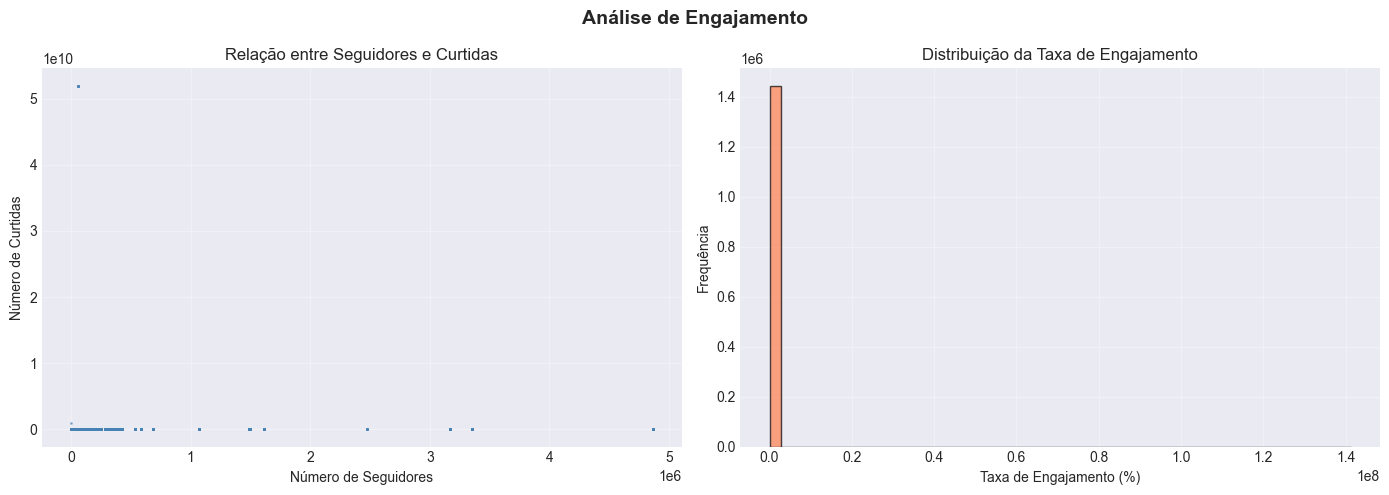

In [30]:
print("\n" + "="*80)
print("ANÁLISE DE ENGAJAMENTO")
print("="*80)

# Taxa de engajamento (com tratamento de divisão por zero)
if 'followers_count' in df.columns and 'like_count' in df.columns:
    df['engagement_rate'] = np.where(
        df['followers_count'] > 0,
        (df['like_count'] / df['followers_count']) * 100,
        np.nan
    )
    
    df['likes_per_media'] = np.where(
        df['media_count'] > 0,
        df['like_count'] / df['media_count'],
        np.nan
    )
    
    # Remover infinitos
    df['engagement_rate'] = df['engagement_rate'].replace([np.inf, -np.inf], np.nan)
    df['likes_per_media'] = df['likes_per_media'].replace([np.inf, -np.inf], np.nan)
    
    print("\n📊 Métricas de Engajamento:")
    print(f"  - Taxa de engajamento média: {df['engagement_rate'].mean():.2f}%")
    print(f"  - Taxa de engajamento mediana: {df['engagement_rate'].median():.2f}%")
    print(f"  - Curtidas por mídia (média): {df['likes_per_media'].mean():.2f}")
    
    # Top empresas por engajamento
    print("\n🏆 Top 10 empresas com maior taxa de engajamento:")
    top_engagement = df.nlargest(10, 'engagement_rate')[['cnpj', 'followers_count', 'like_count', 'engagement_rate']]
    print(top_engagement.to_string(index=False))
    
    # Visualização de engajamento
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    fig.suptitle('Análise de Engajamento', fontsize=14, fontweight='bold')
    
    # Scatter: Followers vs Likes (remover NaN)
    valid_data = df[['followers_count', 'like_count']].dropna()
    if len(valid_data) > 0:
        axes[0].scatter(valid_data['followers_count'], valid_data['like_count'], alpha=0.5, c='steelblue', s=1)
        axes[0].set_xlabel('Número de Seguidores')
        axes[0].set_ylabel('Número de Curtidas')
        axes[0].set_title('Relação entre Seguidores e Curtidas')
        axes[0].grid(True, alpha=0.3)
    
    # Histogram: Engagement Rate
    engagement_clean = df['engagement_rate'].dropna()
    if len(engagement_clean) > 0:
        axes[1].hist(engagement_clean, bins=50, color='coral', edgecolor='black', alpha=0.7)
        axes[1].set_xlabel('Taxa de Engajamento (%)')
        axes[1].set_ylabel('Frequência')
        axes[1].set_title('Distribuição da Taxa de Engajamento')
        axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Colunas necessárias para análise de engajamento não encontradas")



## 14. Análise por CNPJ (Agregação)



In [31]:
print("\n" + "="*80)
print("ANÁLISE POR CNPJ (AGREGAÇÃO)")
print("="*80)

if 'cnpj' in df.columns:
    # Estatísticas por empresa
    print("\n📊 Estatísticas por Empresa (CNPJ):")
    
    # Número de empresas únicas
    empresas_unicas = df['cnpj'].nunique()
    print(f"  - Total de empresas únicas: {empresas_unicas:,}")
    print(f"  - Total de posts: {len(df):,}")
    print(f"  - Média de posts por empresa: {len(df)/empresas_unicas:.2f}")
    
    # Agregações por CNPJ
    numeric_cols = ['followers_count', 'media_count', 'like_count', 'engagement_rate']
    numeric_cols = [col for col in numeric_cols if col in df.columns]
    
    if len(numeric_cols) > 0:
        agg_dict = {}
        for col in numeric_cols:
            agg_dict[col] = ['mean', 'max', 'min', 'std']
        agg_dict['cnpj'] = 'count'  # Contar posts
        
        df_empresas = df.groupby('cnpj').agg(agg_dict)
        df_empresas.columns = ['_'.join(col).replace('cnpj_count', 'total_posts') for col in df_empresas.columns]
        
        print("\n📊 Estatísticas agregadas por empresa:")
        print(df_empresas.describe())
        
        # Top empresas por seguidores
        if 'followers_count_mean' in df_empresas.columns:
            print("\n🏆 Top 10 empresas com mais seguidores (média):")
            top_followers = df_empresas.nlargest(10, 'followers_count_mean')[['followers_count_mean', 'total_posts']]
            print(top_followers)
        
        # Top empresas por engajamento
        if 'engagement_rate_mean' in df_empresas.columns:
            print("\n🏆 Top 10 empresas com maior engajamento (média):")
            top_engagement = df_empresas.nlargest(10, 'engagement_rate_mean')[['engagement_rate_mean', 'total_posts']]
            print(top_engagement)
else:
    print("⚠️ Coluna 'cnpj' não encontrada no dataset")




ANÁLISE POR CNPJ (AGREGAÇÃO)

📊 Estatísticas por Empresa (CNPJ):
  - Total de empresas únicas: 4,146
  - Total de posts: 2,068,457
  - Média de posts por empresa: 498.90

📊 Estatísticas agregadas por empresa:
       followers_count_mean  followers_count_max  followers_count_min  \
count               3805.00              3805.00              3805.00   
mean               16869.14             17072.44             16278.44   
std               130602.96            131079.44            128414.91   
min                    1.00                 1.00                 1.00   
25%                  846.00               849.00               819.00   
50%                 2425.00              2440.00              2349.00   
75%                 7294.00              7378.00              7025.00   
max              4863622.00           4863622.00           4863622.00   

       followers_count_std  media_count_mean  media_count_max  \
count              3768.00           3782.00          3782.00   
me

## 15. Insights e Conclusões



In [32]:
print("\n" + "="*80)
print("INSIGHTS E CONCLUSÕES")
print("="*80)

print("\n📌 PRINCIPAIS INSIGHTS:")

# 1. Distribuição de seguidores
if 'followers_count' in df.columns:
    print(f"\n1️⃣ SEGUIDORES:")
    print(f"   - Média de seguidores: {df['followers_count'].mean():.0f}")
    print(f"   - Mediana de seguidores: {df['followers_count'].median():.0f}")
    print(f"   - Maior conta: {df['followers_count'].max():.0f} seguidores")
    print(f"   - Menor conta: {df['followers_count'].min():.0f} seguidores")

# 2. Atividade de postagem
if 'media_count' in df.columns:
    print(f"\n2️⃣ ATIVIDADE DE POSTAGEM:")
    print(f"   - Média de mídias: {df['media_count'].mean():.0f}")
    print(f"   - Conta mais ativa: {df['media_count'].max():.0f} posts")
    if 'year' in df.columns and df['year'].notna().sum() > 0:
        print(f"   - Ano com mais posts: {df['year'].value_counts().idxmax()}")
    if 'day_name' in df.columns and df['day_name'].notna().sum() > 0:
        print(f"   - Dia da semana mais ativo: {df['day_name'].value_counts().idxmax()}")
    if 'hour' in df.columns and df['hour'].notna().sum() > 0:
        print(f"   - Horário mais ativo: {df['hour'].value_counts().idxmax()}h")

# 3. Engajamento
if 'engagement_rate' in df.columns:
    print(f"\n3️⃣ ENGAJAMENTO:")
    if df['engagement_rate'].notna().sum() > 0:
        print(f"   - Taxa média de engajamento: {df['engagement_rate'].mean():.2f}%")
    if 'likes_per_media' in df.columns and df['likes_per_media'].notna().sum() > 0:
        print(f"   - Curtidas por post (média): {df['likes_per_media'].mean():.2f}")

# 4. Conteúdo
print(f"\n4️⃣ CONTEÚDO:")
if 'has_emoji_bio' in df.columns:
    print(f"   - Biografias com emoji: {(df['has_emoji_bio'].sum()/len(df))*100:.2f}%")
if 'caption_words' in df.columns:
    print(f"   - Comprimento médio de caption: {df['caption_words'].mean():.0f} palavras")
if 'caption' in df.columns:
    all_caption_hashtags = ' '.join(df['caption'].fillna('').astype(str))
    caption_hashtags = re.findall(r'#\w+', all_caption_hashtags)
    print(f"   - Total de hashtags únicas (captions): {len(set(caption_hashtags)):,}")

# 5. Perfil das contas
print(f"\n5️⃣ PERFIL DAS CONTAS:")
if 'business_account' in df.columns:
    business_dist = df['business_account'].value_counts()
    print(f"   - Contas comerciais: {(business_dist.get(True, 0)/len(df))*100:.2f}%")
if 'cnpj' in df.columns:
    print(f"   - Empresas únicas: {df['cnpj'].nunique():,}")
    print(f"   - Média de posts por empresa: {len(df)/df['cnpj'].nunique():.2f}")

# 6. Correlações importantes
print(f"\n6️⃣ CORRELAÇÕES:")
numeric_df = df.select_dtypes(include=[np.number])
if len(numeric_df.columns) > 1:
    correlation_matrix = numeric_df.corr()
    if 'followers_count' in correlation_matrix.columns and 'like_count' in correlation_matrix.columns:
        corr_value = correlation_matrix.loc['followers_count', 'like_count']
        if not np.isnan(corr_value):
            print(f"   - Seguidores vs Curtidas: {corr_value:.3f}")
    if 'followers_count' in correlation_matrix.columns and 'media_count' in correlation_matrix.columns:
        corr_value = correlation_matrix.loc['followers_count', 'media_count']
        if not np.isnan(corr_value):
            print(f"   - Seguidores vs Mídias: {corr_value:.3f}")

print("\n" + "="*80)
print("✅ ANÁLISE EXPLORATÓRIA CONCLUÍDA COM SUCESSO!")
print("="*80)

# Salvar dataset processado
print("\n💾 Salvando dataset processado...")
df.to_csv('dados_unidos_eda_processado.csv', index=False)
print("✅ Dataset salvo em: dados_unidos_eda_processado.csv")




INSIGHTS E CONCLUSÕES

📌 PRINCIPAIS INSIGHTS:

1️⃣ SEGUIDORES:
   - Média de seguidores: 37275
   - Mediana de seguidores: 6198
   - Maior conta: 4863622 seguidores
   - Menor conta: 0 seguidores

2️⃣ ATIVIDADE DE POSTAGEM:
   - Média de mídias: 1173
   - Conta mais ativa: 11264 posts
   - Ano com mais posts: 2024.0
   - Dia da semana mais ativo: Friday
   - Horário mais ativo: 13.0h

3️⃣ ENGAJAMENTO:
   - Taxa média de engajamento: 577.89%
   - Curtidas por post (média): 504.97

4️⃣ CONTEÚDO:
   - Biografias com emoji: 59.55%
   - Comprimento médio de caption: 47 palavras
   - Total de hashtags únicas (captions): 453,827

5️⃣ PERFIL DAS CONTAS:
   - Contas comerciais: 62.47%
   - Empresas únicas: 4,146
   - Média de posts por empresa: 498.90

6️⃣ CORRELAÇÕES:
   - Seguidores vs Curtidas: 0.000
   - Seguidores vs Mídias: 0.106

✅ ANÁLISE EXPLORATÓRIA CONCLUÍDA COM SUCESSO!

💾 Salvando dataset processado...
✅ Dataset salvo em: dados_unidos_eda_processado.csv


## 16. Dashboard de Resumo - Visualizações Consolidadas

Esta seção apresenta um dashboard consolidado com os principais resultados e insights do EDA.




DASHBOARD DE RESUMO - VISUALIZAÇÕES CONSOLIDADAS

✅ Dashboard salvo em: dashboard_eda_dados_unidos.png


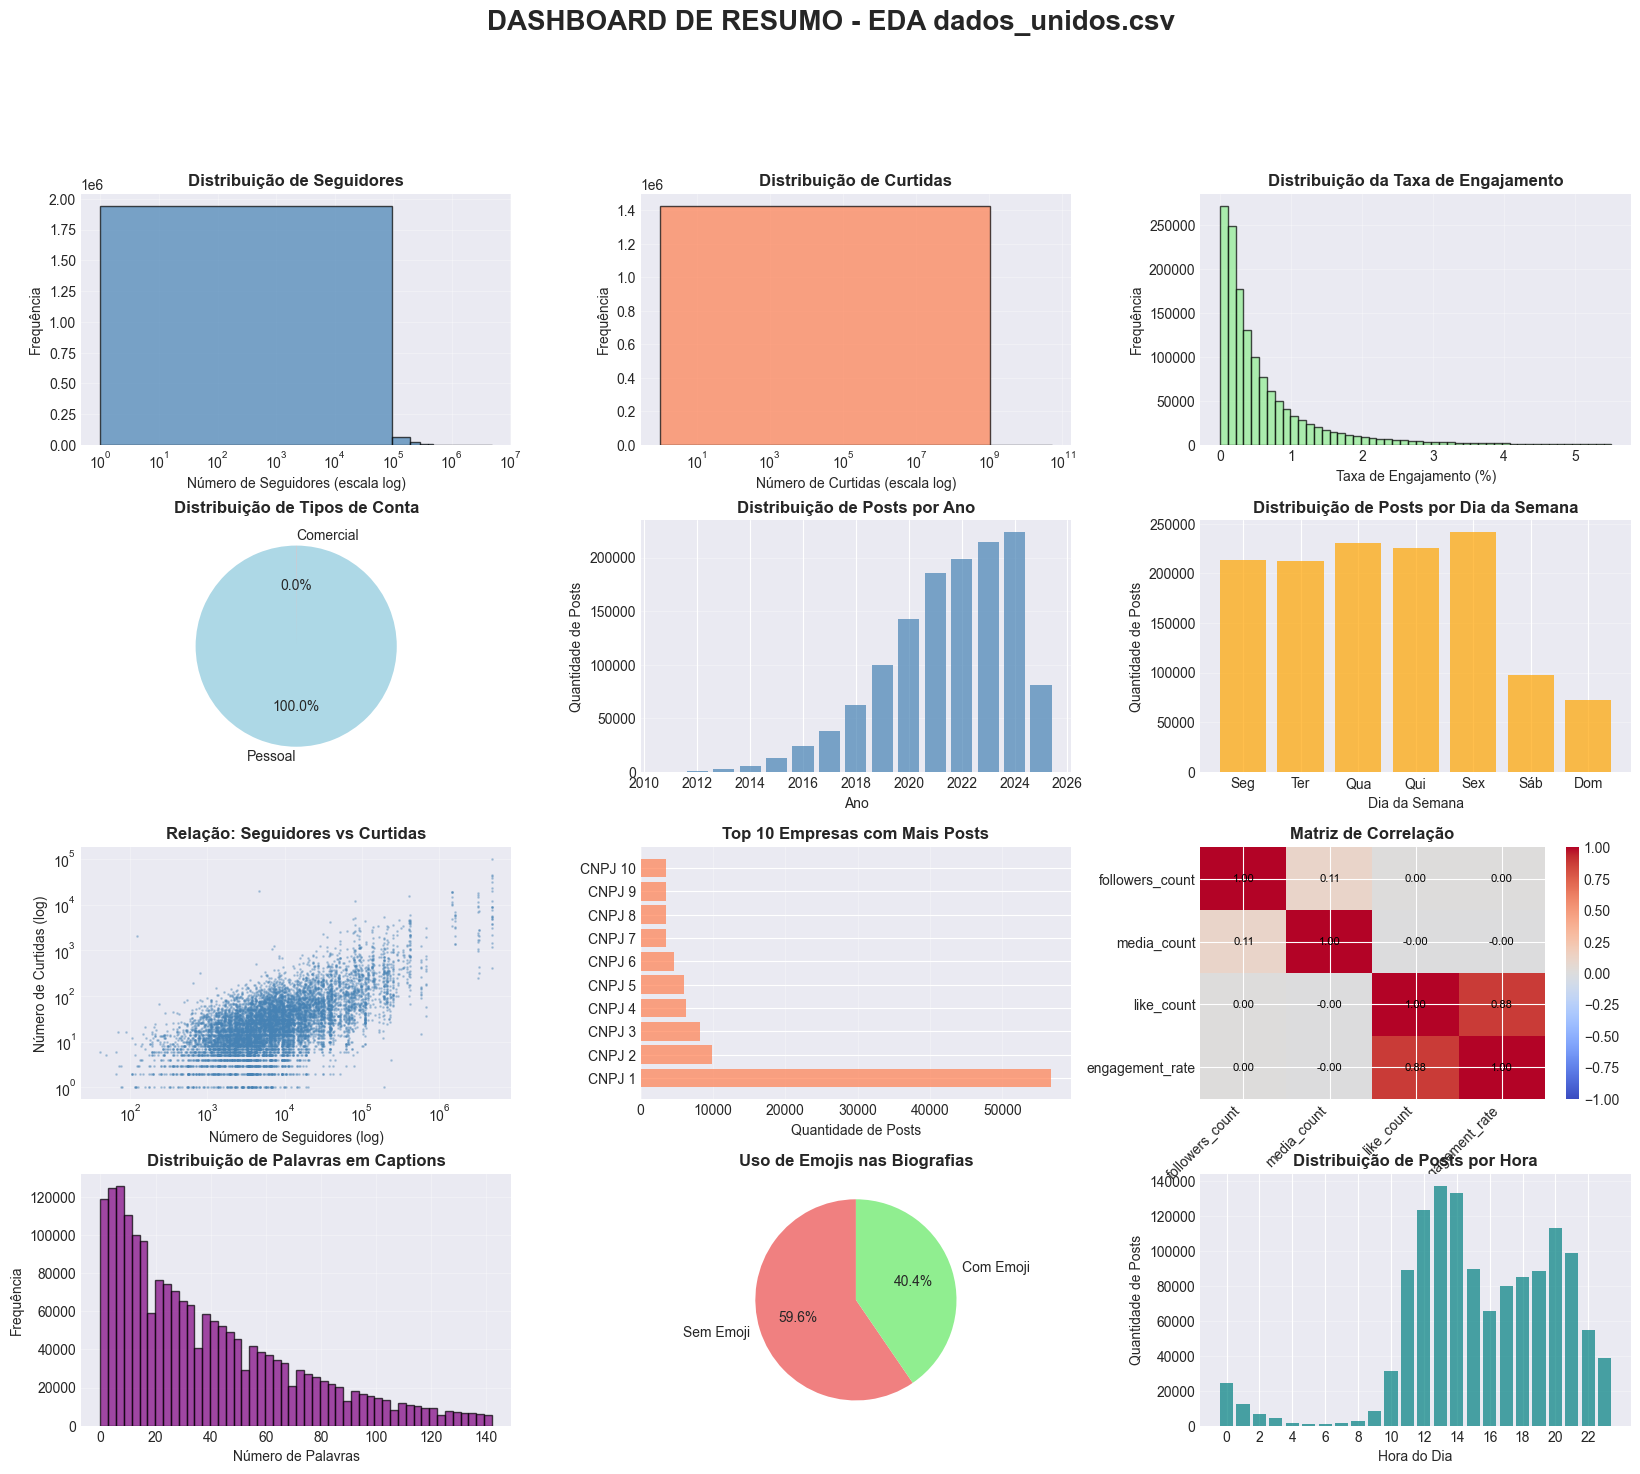

In [33]:
print("\n" + "="*80)
print("DASHBOARD DE RESUMO - VISUALIZAÇÕES CONSOLIDADAS")
print("="*80)

# Criar figura com múltiplos subplots
fig = plt.figure(figsize=(20, 16))
gs = fig.add_gridspec(4, 3, hspace=0.3, wspace=0.3)

# ============================================================================
# 1. Distribuição de Seguidores (Log Scale)
# ============================================================================
ax1 = fig.add_subplot(gs[0, 0])
if 'followers_count' in df.columns:
    followers_clean = df['followers_count'].dropna()
    if len(followers_clean) > 0:
        ax1.hist(followers_clean[followers_clean > 0], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
        ax1.set_xscale('log')
        ax1.set_xlabel('Número de Seguidores (escala log)')
        ax1.set_ylabel('Frequência')
        ax1.set_title('Distribuição de Seguidores', fontweight='bold')
        ax1.grid(True, alpha=0.3)

# ============================================================================
# 2. Distribuição de Curtidas (Log Scale)
# ============================================================================
ax2 = fig.add_subplot(gs[0, 1])
if 'like_count' in df.columns:
    likes_clean = df['like_count'].dropna()
    if len(likes_clean) > 0:
        ax2.hist(likes_clean[likes_clean > 0], bins=50, color='coral', edgecolor='black', alpha=0.7)
        ax2.set_xscale('log')
        ax2.set_xlabel('Número de Curtidas (escala log)')
        ax2.set_ylabel('Frequência')
        ax2.set_title('Distribuição de Curtidas', fontweight='bold')
        ax2.grid(True, alpha=0.3)

# ============================================================================
# 3. Taxa de Engajamento
# ============================================================================
ax3 = fig.add_subplot(gs[0, 2])
if 'engagement_rate' in df.columns:
    engagement_clean = df['engagement_rate'].dropna()
    if len(engagement_clean) > 0:
        # Remover outliers extremos para visualização
        q99 = engagement_clean.quantile(0.99)
        engagement_filtered = engagement_clean[engagement_clean <= q99]
        ax3.hist(engagement_filtered, bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
        ax3.set_xlabel('Taxa de Engajamento (%)')
        ax3.set_ylabel('Frequência')
        ax3.set_title('Distribuição da Taxa de Engajamento', fontweight='bold')
        ax3.grid(True, alpha=0.3)

# ============================================================================
# 4. Distribuição de Business Account
# ============================================================================
ax4 = fig.add_subplot(gs[1, 0])
if 'business_account' in df.columns:
    business_dist = df['business_account'].value_counts()
    colors = ['lightblue', 'lightcoral']
    labels = ['Pessoal', 'Comercial']
    ax4.pie(business_dist.values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
    ax4.set_title('Distribuição de Tipos de Conta', fontweight='bold')

# ============================================================================
# 5. Posts por Ano
# ============================================================================
ax5 = fig.add_subplot(gs[1, 1])
if 'year' in df.columns and df['year'].notna().sum() > 0:
    year_counts = df['year'].value_counts().sort_index()
    ax5.bar(year_counts.index, year_counts.values, color='steelblue', alpha=0.7)
    ax5.set_xlabel('Ano')
    ax5.set_ylabel('Quantidade de Posts')
    ax5.set_title('Distribuição de Posts por Ano', fontweight='bold')
    ax5.grid(True, alpha=0.3, axis='y')

# ============================================================================
# 6. Posts por Dia da Semana
# ============================================================================
ax6 = fig.add_subplot(gs[1, 2])
if 'day_name' in df.columns and df['day_name'].notna().sum() > 0:
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    day_counts = df['day_name'].value_counts().reindex(day_order)
    day_labels = ['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb', 'Dom']
    ax6.bar(day_labels, day_counts.values, color='orange', alpha=0.7)
    ax6.set_xlabel('Dia da Semana')
    ax6.set_ylabel('Quantidade de Posts')
    ax6.set_title('Distribuição de Posts por Dia da Semana', fontweight='bold')
    ax6.grid(True, alpha=0.3, axis='y')

# ============================================================================
# 7. Relação Seguidores vs Curtidas (Scatter)
# ============================================================================
ax7 = fig.add_subplot(gs[2, 0])
if 'followers_count' in df.columns and 'like_count' in df.columns:
    valid_data = df[['followers_count', 'like_count']].dropna()
    valid_data = valid_data[(valid_data['followers_count'] > 0) & (valid_data['like_count'] > 0)]
    if len(valid_data) > 0:
        # Amostrar para visualização (se muitos pontos)
        if len(valid_data) > 10000:
            valid_data = valid_data.sample(n=10000, random_state=42)
        ax7.scatter(valid_data['followers_count'], valid_data['like_count'], 
                   alpha=0.3, s=1, c='steelblue')
        ax7.set_xscale('log')
        ax7.set_yscale('log')
        ax7.set_xlabel('Número de Seguidores (log)')
        ax7.set_ylabel('Número de Curtidas (log)')
        ax7.set_title('Relação: Seguidores vs Curtidas', fontweight='bold')
        ax7.grid(True, alpha=0.3)

# ============================================================================
# 8. Top 10 Empresas com Mais Posts
# ============================================================================
ax8 = fig.add_subplot(gs[2, 1])
if 'cnpj' in df.columns:
    top_companies = df['cnpj'].value_counts().head(10)
    ax8.barh(range(len(top_companies)), top_companies.values, color='coral', alpha=0.7)
    ax8.set_yticks(range(len(top_companies)))
    ax8.set_yticklabels([f"CNPJ {i+1}" for i in range(len(top_companies))])
    ax8.set_xlabel('Quantidade de Posts')
    ax8.set_title('Top 10 Empresas com Mais Posts', fontweight='bold')
    ax8.grid(True, alpha=0.3, axis='x')

# ============================================================================
# 9. Matriz de Correlação (Principais Variáveis)
# ============================================================================
ax9 = fig.add_subplot(gs[2, 2])
numeric_cols = ['followers_count', 'media_count', 'like_count', 'engagement_rate']
numeric_cols = [col for col in numeric_cols if col in df.columns]
if len(numeric_cols) > 1:
    corr_matrix = df[numeric_cols].corr()
    im = ax9.imshow(corr_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
    ax9.set_xticks(range(len(corr_matrix.columns)))
    ax9.set_yticks(range(len(corr_matrix.columns)))
    ax9.set_xticklabels(corr_matrix.columns, rotation=45, ha='right')
    ax9.set_yticklabels(corr_matrix.columns)
    ax9.set_title('Matriz de Correlação', fontweight='bold')
    # Adicionar valores na matriz
    for i in range(len(corr_matrix.columns)):
        for j in range(len(corr_matrix.columns)):
            text = ax9.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}',
                          ha="center", va="center", color="black", fontsize=8)
    plt.colorbar(im, ax=ax9)

# ============================================================================
# 10. Comprimento de Captions
# ============================================================================
ax10 = fig.add_subplot(gs[3, 0])
if 'caption_words' in df.columns:
    caption_words_clean = df['caption_words'].dropna()
    if len(caption_words_clean) > 0:
        # Filtrar outliers
        q95 = caption_words_clean.quantile(0.95)
        caption_filtered = caption_words_clean[caption_words_clean <= q95]
        ax10.hist(caption_filtered, bins=50, color='purple', edgecolor='black', alpha=0.7)
        ax10.set_xlabel('Número de Palavras')
        ax10.set_ylabel('Frequência')
        ax10.set_title('Distribuição de Palavras em Captions', fontweight='bold')
        ax10.grid(True, alpha=0.3)

# ============================================================================
# 11. Uso de Emojis nas Biografias
# ============================================================================
ax11 = fig.add_subplot(gs[3, 1])
if 'has_emoji_bio' in df.columns:
    emoji_dist = df['has_emoji_bio'].value_counts()
    colors_emoji = ['lightcoral', 'lightgreen']
    labels_emoji = ['Sem Emoji', 'Com Emoji']
    ax11.pie(emoji_dist.values, labels=labels_emoji, autopct='%1.1f%%', 
             colors=colors_emoji, startangle=90)
    ax11.set_title('Uso de Emojis nas Biografias', fontweight='bold')

# ============================================================================
# 12. Posts por Hora do Dia
# ============================================================================
ax12 = fig.add_subplot(gs[3, 2])
if 'hour' in df.columns and df['hour'].notna().sum() > 0:
    hour_counts = df['hour'].value_counts().sort_index()
    ax12.bar(hour_counts.index, hour_counts.values, color='teal', alpha=0.7)
    ax12.set_xlabel('Hora do Dia')
    ax12.set_ylabel('Quantidade de Posts')
    ax12.set_title('Distribuição de Posts por Hora', fontweight='bold')
    ax12.set_xticks(range(0, 24, 2))
    ax12.grid(True, alpha=0.3, axis='y')

# Título geral
fig.suptitle('DASHBOARD DE RESUMO - EDA dados_unidos.csv', 
             fontsize=20, fontweight='bold', y=0.995)

plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.savefig('dashboard_eda_dados_unidos.png', dpi=300, bbox_inches='tight')
print("\n✅ Dashboard salvo em: dashboard_eda_dados_unidos.png")
plt.show()



## 17. Estatísticas Resumidas em Tabela



In [34]:
print("\n" + "="*80)
print("TABELA RESUMIDA DE ESTATÍSTICAS")
print("="*80)

# Criar tabela resumida
resumo_stats = []

# Estatísticas básicas
resumo_stats.append({
    'Métrica': 'Total de Registros',
    'Valor': f"{len(df):,}"
})

resumo_stats.append({
    'Métrica': 'Empresas Únicas (CNPJs)',
    'Valor': f"{df['cnpj'].nunique():,}" if 'cnpj' in df.columns else 'N/A'
})

# Estatísticas numéricas
if 'followers_count' in df.columns:
    resumo_stats.append({
        'Métrica': 'Média de Seguidores',
        'Valor': f"{df['followers_count'].mean():.0f}"
    })
    resumo_stats.append({
        'Métrica': 'Mediana de Seguidores',
        'Valor': f"{df['followers_count'].median():.0f}"
    })

if 'like_count' in df.columns:
    resumo_stats.append({
        'Métrica': 'Média de Curtidas',
        'Valor': f"{df['like_count'].mean():.0f}"
    })

if 'media_count' in df.columns:
    resumo_stats.append({
        'Métrica': 'Média de Posts por Conta',
        'Valor': f"{df['media_count'].mean():.0f}"
    })

if 'engagement_rate' in df.columns and df['engagement_rate'].notna().sum() > 0:
    resumo_stats.append({
        'Métrica': 'Taxa Média de Engajamento (%)',
        'Valor': f"{df['engagement_rate'].mean():.2f}%"
    })

# Estatísticas categóricas
if 'business_account' in df.columns:
    business_dist = df['business_account'].value_counts()
    resumo_stats.append({
        'Métrica': 'Contas Comerciais (%)',
        'Valor': f"{(business_dist.get(True, 0)/len(df))*100:.2f}%"
    })

if 'has_emoji_bio' in df.columns:
    resumo_stats.append({
        'Métrica': 'Biografias com Emoji (%)',
        'Valor': f"{(df['has_emoji_bio'].sum()/len(df))*100:.2f}%"
    })

# Estatísticas temporais
if 'year' in df.columns and df['year'].notna().sum() > 0:
    resumo_stats.append({
        'Métrica': 'Ano com Mais Posts',
        'Valor': f"{df['year'].value_counts().idxmax()}"
    })

if 'day_name' in df.columns and df['day_name'].notna().sum() > 0:
    resumo_stats.append({
        'Métrica': 'Dia da Semana Mais Ativo',
        'Valor': f"{df['day_name'].value_counts().idxmax()}"
    })

if 'hour' in df.columns and df['hour'].notna().sum() > 0:
    resumo_stats.append({
        'Métrica': 'Horário Mais Ativo',
        'Valor': f"{df['hour'].value_counts().idxmax()}h"
    })

# Estatísticas de texto
if 'caption_words' in df.columns:
    resumo_stats.append({
        'Métrica': 'Média de Palavras por Caption',
        'Valor': f"{df['caption_words'].mean():.0f}"
    })

# Criar DataFrame e exibir
df_resumo = pd.DataFrame(resumo_stats)
print("\n")
print(df_resumo.to_string(index=False))

# Salvar tabela resumida
df_resumo.to_csv('resumo_estatisticas_eda.csv', index=False)
print("\n✅ Tabela resumida salva em: resumo_estatisticas_eda.csv")




TABELA RESUMIDA DE ESTATÍSTICAS


                      Métrica     Valor
           Total de Registros 2,068,457
      Empresas Únicas (CNPJs)     4,146
          Média de Seguidores     37275
        Mediana de Seguidores      6198
            Média de Curtidas    253284
     Média de Posts por Conta      1173
Taxa Média de Engajamento (%)   577.89%
        Contas Comerciais (%)    62.47%
     Biografias com Emoji (%)    59.55%
           Ano com Mais Posts    2024.0
     Dia da Semana Mais Ativo    Friday
           Horário Mais Ativo     13.0h
Média de Palavras por Caption        47

✅ Tabela resumida salva em: resumo_estatisticas_eda.csv


## 18. Mapa de Calor - Posts por Dia da Semana e Hora

Visualização de padrões temporais de postagem através de um heatmap mostrando a distribuição de posts por dia da semana e hora do dia.



In [ ]:
print("\n" + "="*80)
print("MAPA DE CALOR - POSTS POR DIA DA SEMANA E HORA")
print("="*80)

# Verificar se as colunas necessárias existem
if 'day_name' in df.columns and 'hour' in df.columns:
    # Filtrar dados válidos
    df_heatmap = df[['day_name', 'hour']].dropna()
    
    if len(df_heatmap) > 0:
        # Ordenar dias da semana corretamente
        day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        day_labels = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo']
        
        # Garantir que day_name seja categórica com ordem correta
        df_heatmap['day_name'] = pd.Categorical(df_heatmap['day_name'], categories=day_order, ordered=True)
        
        # Criar tabela de contingência (crosstab)
        heatmap_data = pd.crosstab(
            df_heatmap['day_name'],
            df_heatmap['hour']
        )
        
        # Reordenar índices para garantir ordem correta e renomear
        heatmap_data = heatmap_data.reindex(day_order)
        heatmap_data.index = day_labels
        
        # Ordenar colunas (horas) de 0 a 23
        heatmap_data = heatmap_data.sort_index(axis=1)
        
        # Criar figura
        plt.figure(figsize=(16, 8))
        
        # Criar heatmap
        sns.heatmap(
            heatmap_data,
            annot=True,  # Mostrar valores nas células
            fmt='d',  # Formato inteiro
            cmap='YlOrRd',  # Colormap (amarelo-laranja-vermelho)
            cbar_kws={'label': 'Quantidade de Posts'},
            linewidths=0.5,
            linecolor='gray',
            square=False,
            vmin=0
        )
        
        plt.title('Mapa de Calor - Distribuição de Posts por Dia da Semana e Hora do Dia', 
                 fontsize=16, fontweight='bold', pad=20)
        plt.xlabel('Hora do Dia', fontsize=12, fontweight='bold')
        plt.ylabel('Dia da Semana', fontsize=12, fontweight='bold')
        plt.xticks(rotation=0)
        plt.yticks(rotation=0)
        
        plt.tight_layout()
        
        # Salvar figura
        plt.savefig('heatmap_posts_dia_hora.png', dpi=300, bbox_inches='tight')
        print("\n✅ Mapa de calor salvo em: heatmap_posts_dia_hora.png")
        
        plt.show()
        
        # Estatísticas adicionais
        print("\n📊 Estatísticas do Heatmap:")
        print(f"  - Total de posts analisados: {len(df_heatmap):,}")
        print(f"  - Hora com mais posts: {heatmap_data.sum(axis=0).idxmax()}h ({heatmap_data.sum(axis=0).max():,} posts)")
        print(f"  - Dia da semana com mais posts: {heatmap_data.sum(axis=1).idxmax()} ({heatmap_data.sum(axis=1).max():,} posts)")
        print(f"  - Hora com menos posts: {heatmap_data.sum(axis=0).idxmin()}h ({heatmap_data.sum(axis=0).min():,} posts)")
        print(f"  - Dia da semana com menos posts: {heatmap_data.sum(axis=1).idxmin()} ({heatmap_data.sum(axis=1).min():,} posts)")
        
        # Célula com maior concentração
        max_cell = heatmap_data.max().max()
        max_day, max_hour = heatmap_data.stack().idxmax()
        print(f"\n🔥 Maior concentração de posts:")
        print(f"  - {max_day} às {max_hour}h: {max_cell:,} posts")
        
        # Mostrar tabela de dados
        print("\n📋 Tabela de Dados (primeiras 5 horas):")
        print(heatmap_data.iloc[:, :5].to_string())
        
    else:
        print("⚠️ Não há dados válidos para criar o heatmap (valores ausentes em 'day_name' ou 'hour')")
else:
    print("⚠️ Colunas 'day_name' ou 'hour' não encontradas no dataset")
    print("   Certifique-se de que a análise temporal foi executada anteriormente")



## 19. Mapa de Calor Normalizado - Percentual de Posts

Versão normalizada do heatmap mostrando a distribuição percentual de posts (facilita identificar padrões relativos).




MAPA DE CALOR NORMALIZADO - PERCENTUAL DE POSTS

✅ Mapa de calor normalizado salvo em: heatmap_posts_dia_hora_normalizado.png


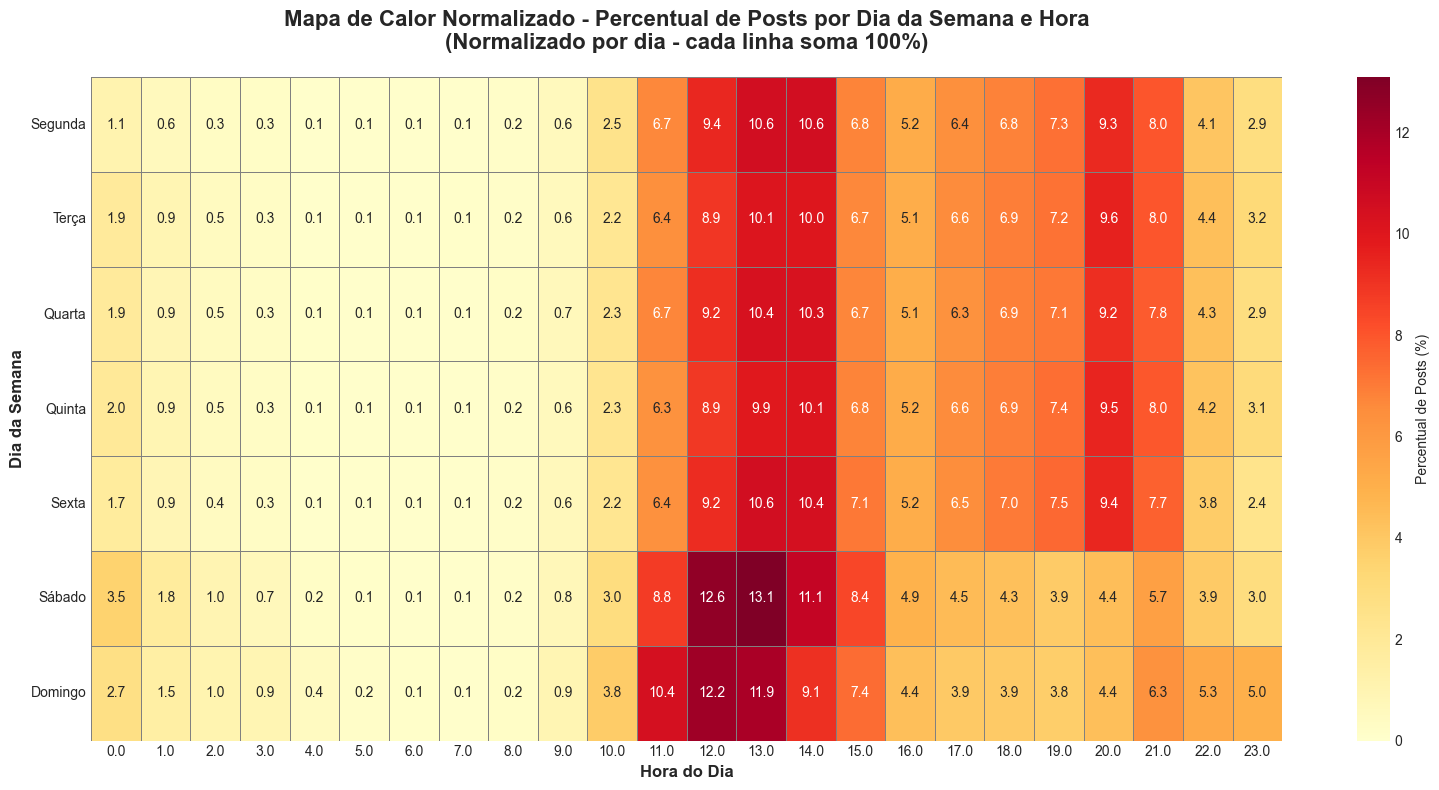


⏰ Horários de Pico por Dia da Semana:
  - Segunda: 13.0h (10.6% dos posts do dia)
  - Terça: 13.0h (10.1% dos posts do dia)
  - Quarta: 13.0h (10.4% dos posts do dia)
  - Quinta: 14.0h (10.1% dos posts do dia)
  - Sexta: 13.0h (10.6% dos posts do dia)
  - Sábado: 13.0h (13.1% dos posts do dia)
  - Domingo: 12.0h (12.2% dos posts do dia)


In [35]:
print("\n" + "="*80)
print("MAPA DE CALOR NORMALIZADO - PERCENTUAL DE POSTS")
print("="*80)

# Verificar se as colunas necessárias existem
if 'day_name' in df.columns and 'hour' in df.columns:
    # Filtrar dados válidos
    df_heatmap = df[['day_name', 'hour']].dropna()
    
    if len(df_heatmap) > 0:
        # Ordenar dias da semana corretamente
        day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        day_labels = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo']
        
        # Garantir que day_name seja categórica com ordem correta
        df_heatmap['day_name'] = pd.Categorical(df_heatmap['day_name'], categories=day_order, ordered=True)
        
        # Criar tabela de contingência (crosstab)
        heatmap_data = pd.crosstab(
            df_heatmap['day_name'],
            df_heatmap['hour']
        )
        
        # Reordenar índices para garantir ordem correta e renomear
        heatmap_data = heatmap_data.reindex(day_order)
        heatmap_data.index = day_labels
        
        # Ordenar colunas (horas) de 0 a 23
        heatmap_data = heatmap_data.sort_index(axis=1)
        
        # Normalizar por linha (dia da semana) - mostra distribuição percentual por dia
        heatmap_normalized = heatmap_data.div(heatmap_data.sum(axis=1), axis=0) * 100
        
        # Criar figura
        plt.figure(figsize=(16, 8))
        
        # Criar heatmap normalizado
        sns.heatmap(
            heatmap_normalized,
            annot=True,  # Mostrar valores nas células
            fmt='.1f',  # Formato com 1 casa decimal
            cmap='YlOrRd',  # Colormap
            cbar_kws={'label': 'Percentual de Posts (%)'},
            linewidths=0.5,
            linecolor='gray',
            square=False,
            vmin=0
        )
        
        plt.title('Mapa de Calor Normalizado - Percentual de Posts por Dia da Semana e Hora\n' +
                 '(Normalizado por dia - cada linha soma 100%)', 
                 fontsize=16, fontweight='bold', pad=20)
        plt.xlabel('Hora do Dia', fontsize=12, fontweight='bold')
        plt.ylabel('Dia da Semana', fontsize=12, fontweight='bold')
        plt.xticks(rotation=0)
        plt.yticks(rotation=0)
        
        plt.tight_layout()
        
        # Salvar figura
        plt.savefig('heatmap_posts_dia_hora_normalizado.png', dpi=300, bbox_inches='tight')
        print("\n✅ Mapa de calor normalizado salvo em: heatmap_posts_dia_hora_normalizado.png")
        
        plt.show()
        
        # Mostrar horários de pico por dia
        print("\n⏰ Horários de Pico por Dia da Semana:")
        for day in day_labels:
            day_data = heatmap_normalized.loc[day]
            peak_hour = day_data.idxmax()
            peak_percent = day_data.max()
            print(f"  - {day}: {peak_hour}h ({peak_percent:.1f}% dos posts do dia)")
        
    else:
        print("⚠️ Não há dados válidos para criar o heatmap normalizado")
else:
    print("⚠️ Colunas 'day_name' ou 'hour' não encontradas no dataset")



## 20. Top 10 Empresas com Mais Posts - Análise de Sobrevivência

Gráfico mostrando as 10 empresas com mais posts, incluindo o CNPJ e informação sobre sobrevivência (pandemia e/ou enchentes).




TOP 10 EMPRESAS COM MAIS POSTS - ANÁLISE DE SOBREVIVÊNCIA

✅ Gráfico salvo em: top10_empresas_posts_sobrevivencia.png


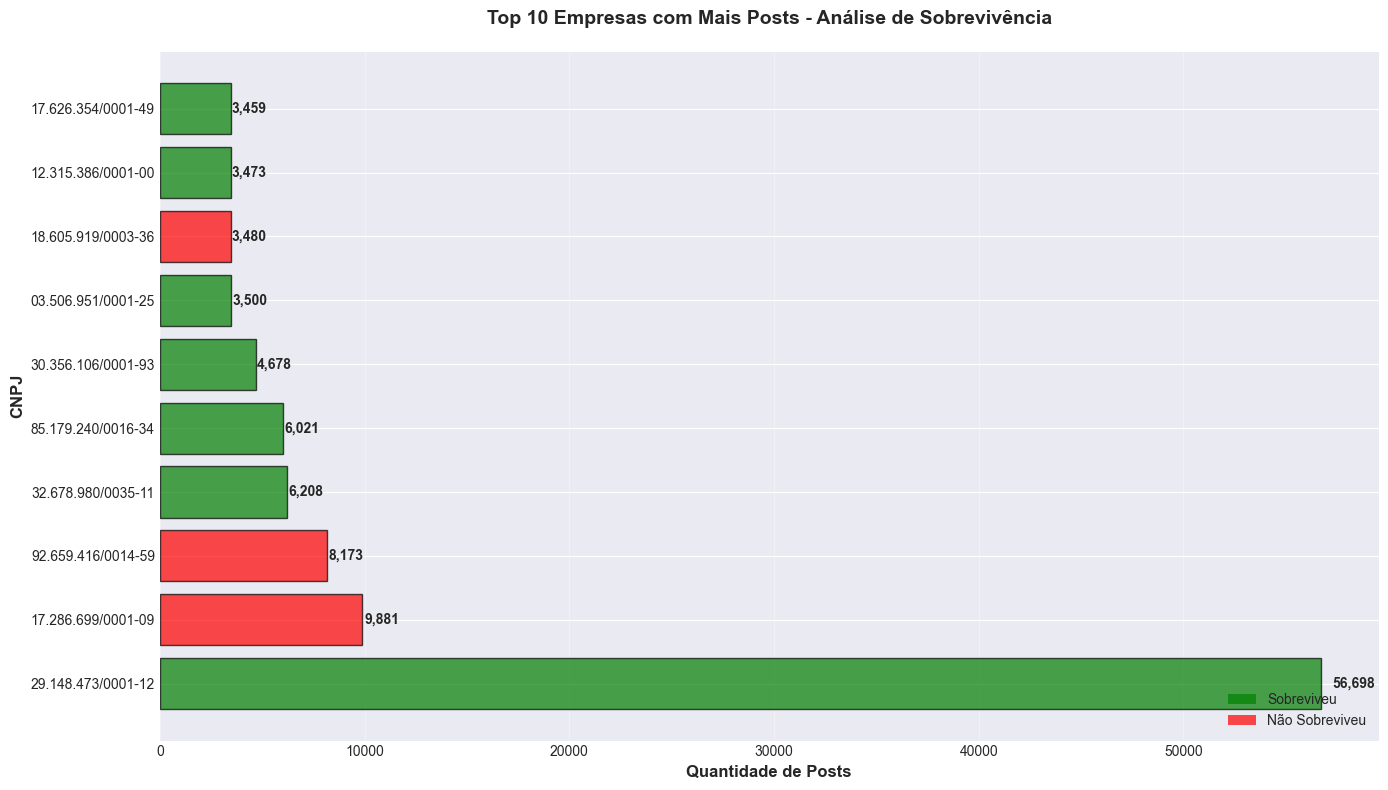


📊 Detalhes das Top 10 Empresas:
              CNPJ  Total Posts Sobreviveu Seguidores
29.148.473/0001-12        56698        Sim        N/A
17.286.699/0001-09         9881        Não      1,221
92.659.416/0014-59         8173        Não      1,808
32.678.980/0035-11         6208        Sim    186,885
85.179.240/0016-34         6021        Sim      2,301
30.356.106/0001-93         4678        Sim     38,710
03.506.951/0001-25         3500        Sim      4,250
18.605.919/0003-36         3480        Não        107
12.315.386/0001-00         3473        Sim     52,251
17.626.354/0001-49         3459        Sim     15,820

✅ Tabela detalhada salva em: top10_empresas_detalhes.csv

📈 Estatísticas Resumidas:


: 

In [ ]:
print("\n" + "="*80)
print("TOP 10 EMPRESAS COM MAIS POSTS - ANÁLISE DE SOBREVIVÊNCIA")
print("="*80)

if 'cnpj' in df.columns:
    # Identificar colunas de sobrevivência disponíveis
    sobreviveu_cols = []
    if 'sobreviveu_pandemia' in df.columns:
        sobreviveu_cols.append('sobreviveu_pandemia')
    if 'sobreviveu_enchente' in df.columns:
        sobreviveu_cols.append('sobreviveu_enchente')
    if 'sobreviveu' in df.columns:
        sobreviveu_cols.append('sobreviveu')
    
    # Contar posts por CNPJ
    posts_por_cnpj = df['cnpj'].value_counts().head(10)
    
    # Criar DataFrame com informações das top 10 empresas
    top_empresas = []
    
    for cnpj in posts_por_cnpj.index:
        empresa_data = df[df['cnpj'] == cnpj].iloc[0]  # Pegar primeira linha (dados da empresa)
        
        info_empresa = {
            'cnpj': cnpj,
            'total_posts': posts_por_cnpj[cnpj]
        }
        
        # Adicionar informações de sobrevivência
        if 'sobreviveu_pandemia' in df.columns:
            sobreviveu_pand = empresa_data.get('sobreviveu_pandemia', None)
            if pd.notna(sobreviveu_pand):
                info_empresa['sobreviveu_pandemia'] = bool(sobreviveu_pand)
            else:
                info_empresa['sobreviveu_pandemia'] = None
        
        if 'sobreviveu_enchente' in df.columns:
            sobreviveu_ench = empresa_data.get('sobreviveu_enchente', None)
            if pd.notna(sobreviveu_ench):
                info_empresa['sobreviveu_enchente'] = bool(sobreviveu_ench)
            else:
                info_empresa['sobreviveu_enchente'] = None
        
        if 'sobreviveu' in df.columns:
            sobreviveu = empresa_data.get('sobreviveu', None)
            if pd.notna(sobreviveu):
                info_empresa['sobreviveu'] = bool(sobreviveu)
            else:
                info_empresa['sobreviveu'] = None
        
        # Adicionar outras métricas se disponíveis
        if 'followers_count' in df.columns:
            info_empresa['followers_count'] = empresa_data.get('followers_count', None)
        if 'like_count' in df.columns:
            info_empresa['like_count'] = empresa_data.get('like_count', None)
        
        top_empresas.append(info_empresa)
    
    df_top_empresas = pd.DataFrame(top_empresas)
    
    # Criar gráfico
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Determinar cor baseada na sobrevivência
    cores = []
    labels_sobreviveu = []
    
    # Priorizar: sobreviveu_pandemia > sobreviveu_enchente > sobreviveu
    if 'sobreviveu_pandemia' in df_top_empresas.columns:
        for idx, row in df_top_empresas.iterrows():
            if pd.notna(row['sobreviveu_pandemia']):
                if row['sobreviveu_pandemia']:
                    cores.append('green')
                    labels_sobreviveu.append('Sobreviveu à Pandemia')
                else:
                    cores.append('red')
                    labels_sobreviveu.append('Não Sobreviveu à Pandemia')
            else:
                cores.append('gray')
                labels_sobreviveu.append('Dados não disponíveis')
    elif 'sobreviveu_enchente' in df_top_empresas.columns:
        for idx, row in df_top_empresas.iterrows():
            if pd.notna(row['sobreviveu_enchente']):
                if row['sobreviveu_enchente']:
                    cores.append('green')
                    labels_sobreviveu.append('Sobreviveu às Enchentes')
                else:
                    cores.append('red')
                    labels_sobreviveu.append('Não Sobreviveu às Enchentes')
            else:
                cores.append('gray')
                labels_sobreviveu.append('Dados não disponíveis')
    elif 'sobreviveu' in df_top_empresas.columns:
        for idx, row in df_top_empresas.iterrows():
            if pd.notna(row['sobreviveu']):
                if row['sobreviveu']:
                    cores.append('green')
                    labels_sobreviveu.append('Sobreviveu')
                else:
                    cores.append('red')
                    labels_sobreviveu.append('Não Sobreviveu')
            else:
                cores.append('gray')
                labels_sobreviveu.append('Dados não disponíveis')
    else:
        cores = ['steelblue'] * len(df_top_empresas)
        labels_sobreviveu = ['Sem dados de sobrevivência'] * len(df_top_empresas)
    
    # Criar gráfico de barras horizontal
    bars = ax.barh(range(len(df_top_empresas)), df_top_empresas['total_posts'], color=cores, alpha=0.7, edgecolor='black')
    
    # Adicionar valores nas barras
    for i, (bar, valor) in enumerate(zip(bars, df_top_empresas['total_posts'])):
        ax.text(valor + valor*0.01, i, f'{int(valor):,}', 
               va='center', fontweight='bold', fontsize=10)
    
    # Configurar eixos
    ax.set_yticks(range(len(df_top_empresas)))
    
    # Formatar CNPJ para exibição (se tiver formatação)
    cnpj_labels = []
    for cnpj in df_top_empresas['cnpj']:
        # Tentar formatar CNPJ se possível
        cnpj_str = str(cnpj)
        if len(cnpj_str) == 14:
            cnpj_formatado = f"{cnpj_str[:2]}.{cnpj_str[2:5]}.{cnpj_str[5:8]}/{cnpj_str[8:12]}-{cnpj_str[12:]}"
        elif len(cnpj_str) > 20:  # Pode ter formatação já
            cnpj_formatado = cnpj_str
        else:
            cnpj_formatado = cnpj_str
        cnpj_labels.append(cnpj_formatado)
    
    ax.set_yticklabels(cnpj_labels, fontsize=10)
    ax.set_xlabel('Quantidade de Posts', fontsize=12, fontweight='bold')
    ax.set_ylabel('CNPJ', fontsize=12, fontweight='bold')
    ax.set_title('Top 10 Empresas com Mais Posts - Análise de Sobrevivência', 
                fontsize=14, fontweight='bold', pad=20)
    ax.grid(True, alpha=0.3, axis='x')
    
    # Criar legenda
    from matplotlib.patches import Patch
    legend_elements = []
    if 'green' in cores:
        legend_elements.append(Patch(facecolor='green', alpha=0.7, label='Sobreviveu'))
    if 'red' in cores:
        legend_elements.append(Patch(facecolor='red', alpha=0.7, label='Não Sobreviveu'))
    if 'gray' in cores:
        legend_elements.append(Patch(facecolor='gray', alpha=0.7, label='Dados não disponíveis'))
    
    if legend_elements:
        ax.legend(handles=legend_elements, loc='lower right', fontsize=10)
    
    plt.tight_layout()
    
    # Salvar figura
    plt.savefig('top10_empresas_posts_sobrevivencia.png', dpi=300, bbox_inches='tight')
    print("\n✅ Gráfico salvo em: top10_empresas_posts_sobrevivencia.png")
    
    plt.show()
    
    # Exibir tabela detalhada
    print("\n📊 Detalhes das Top 10 Empresas:")
    print("="*80)
    
    # Preparar tabela para exibição
    tabela_exibicao = df_top_empresas[['cnpj', 'total_posts']].copy()
    
    # Adicionar colunas de sobrevivência se existirem
    if 'sobreviveu_pandemia' in df_top_empresas.columns:
        tabela_exibicao['Sobreviveu Pandemia'] = df_top_empresas['sobreviveu_pandemia'].apply(
            lambda x: 'Sim' if pd.notna(x) and x else 'Não' if pd.notna(x) else 'N/A'
        )
    
    if 'sobreviveu_enchente' in df_top_empresas.columns:
        tabela_exibicao['Sobreviveu Enchentes'] = df_top_empresas['sobreviveu_enchente'].apply(
            lambda x: 'Sim' if pd.notna(x) and x else 'Não' if pd.notna(x) else 'N/A'
        )
    
    if 'sobreviveu' in df_top_empresas.columns:
        tabela_exibicao['Sobreviveu'] = df_top_empresas['sobreviveu'].apply(
            lambda x: 'Sim' if pd.notna(x) and x else 'Não' if pd.notna(x) else 'N/A'
        )
    
    # Adicionar métricas se disponíveis
    if 'followers_count' in df_top_empresas.columns:
        tabela_exibicao['Seguidores'] = df_top_empresas['followers_count'].apply(
            lambda x: f"{int(x):,}" if pd.notna(x) else 'N/A'
        )
    
    # Renomear colunas para exibição
    tabela_exibicao.columns = ['CNPJ', 'Total Posts'] + list(tabela_exibicao.columns[2:])
    
    print(tabela_exibicao.to_string(index=False))
    
    # Salvar tabela
    tabela_exibicao.to_csv('top10_empresas_detalhes.csv', index=False)
    print("\n✅ Tabela detalhada salva em: top10_empresas_detalhes.csv")
    
    # Estatísticas resumidas
    print("\n📈 Estatísticas Resumidas:")
    if 'sobreviveu_pandemia' in df_top_empresas.columns:
        sobreviveu_pand_count = df_top_empresas['sobreviveu_pandemia'].sum()
        total_com_dados = df_top_empresas['sobreviveu_pandemia'].notna().sum()
        if total_com_dados > 0:
            print(f"  - Empresas que sobreviveram à pandemia: {int(sobreviveu_pand_count)}/{total_com_dados} ({sobreviveu_pand_count/total_com_dados*100:.1f}%)")
    
    if 'sobreviveu_enchente' in df_top_empresas.columns:
        sobreviveu_ench_count = df_top_empresas['sobreviveu_enchente'].sum()
        total_com_dados = df_top_empresas['sobreviveu_enchente'].notna().sum()
        if total_com_dados > 0:
            print(f"  - Empresas que sobreviveram às enchentes: {int(sobreviveu_ench_count)}/{total_com_dados} ({sobreviveu_ench_count/total_com_dados*100:.1f}%)")
    
else:
    print("⚠️ Coluna 'cnpj' não encontrada no dataset")

